Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!
  
  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 14

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=14
num_BackTrack_Days=0

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=8 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
245                                           NaN             Timor-Leste   
246                                           NaN                    Togo   
247                                           NaN     Trinidad and Tobago   
248                                           NaN                 Tunisia   
249                                           NaN                  Turkey   
250                                           NaN           United States   
251                                           NaN                  Uganda   
252                                           NaN                 Ukraine   
253                                           NaN    United Arab Emirates   
254                                      Anguilla          United Kingdom   
255                                       Bermuda          United Kingdom   
256                        British Virgin Islands          United Kingdom   
257                                Cayman Islands          United Kingdom   
258                               Channel Islands          United Kingdom   
259                   Falkland Islands (Malvinas)          United Kingdom   
260                                     Gibraltar          United Kingdom   
261                                   Isle of Man          United Kingdom   
262                                    Montserrat          United Kingdom   
263  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
264                      Turks and Caicos Islands          United Kingdom   
265                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
251                                           NaN             Timor-Leste   
252                                           NaN                    Togo   
253                                           NaN     Trinidad and Tobago   
254                                           NaN                 Tunisia   
255                                           NaN                  Turkey   
256                                           NaN           United States   
257                                           NaN                  Uganda   
258                                           NaN                 Ukraine   
259                                           NaN    United Arab Emirates   
260                                      Anguilla          United Kingdom   
261                                       Bermuda          United Kingdom   
262                        British Virgin Islands          United Kingdom   
263                                Cayman Islands          United Kingdom   
264                               Channel Islands          United Kingdom   
265                   Falkland Islands (Malvinas)          United Kingdom   
266                                     Gibraltar          United Kingdom   
267                                   Isle of Man          United Kingdom   
268                                    Montserrat          United Kingdom   
269  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
270                      Turks and Caicos Islands          United Kingdom   
271                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN  Marshall Islands   7.131500  171.184500        0        0   
186            NaN        Mauritania  21.007900  -10.940800        0        0   
187            NaN         Mauritius -20.348404   57.552152        0        0   
188            NaN            Mexico  23.634500 -102.552800        0        0   
189            NaN        Micronesia   7.425600  150.550800        0        0   
190            NaN           Moldova  47.411600   28.369900        0        0   
191            NaN            Monaco  43.733300    7.416700        0        0   
192            NaN          Mongolia  46.862500  103.846700        0        0   
193            NaN        Montenegro  42.708678   19.374390        0        0   
194            NaN           Morocco  31.791700   -7.092600        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/18/21  5/19/21  5/20/21  \
185        0        0        0        0  ...        0        0        0   
186        0        0        0        0  ...      457      457      457   
187        0        0        0        0  ...       17       17       17   
188        0        0        0        0  ...   220746   220850   221080   
189        0        0        0        0  ...        0        0        0   
190        0        0        0        0  ...     6043     6053     6061   
191        0        0        0        0  ...       32       32       32   
192        0        0        0        0  ...      227      235      240   
193        0        0        0        0  ...     1564     1566     1569   
194        0        0        0        0  ...     9105     9106     9109   

     5/21/21  5/22/21  5/23/21  5/24/21  5/25/21   Population   \
185        0        0        0        0        0           NaN   
186      458      458      458      460      460     4,649,658   
187       17       17       17       17       17           NaN   
188   221256   221597   221647   221695   221960   128,640,794   
189        0        0        0        0        0           NaN   
190     6067     6072     6075     6080     6084     4,035,942   
191       32       32       32       32       32        39,183   
192      244      248      253      255      257     3,278,290   
193     1572     1572     1574     1574     1577       622 500   
194     9115     9119     9122     9126     9129    36,817,128   

                   region  
185  Marshall Islands_nan  
186        Mauritania_nan  
187         Mauritius_nan  
188            Mexico_nan  
189        Micronesia_nan  
190           Moldova_nan  
191            Monaco_nan  
192          Mongolia_nan  
193        Montenegro_nan  
194           Morocco_nan  

[10 rows x 496 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat       Long  \
175                               NaN       Mongolia  46.862500  103.84670   
176                               NaN     Montenegro  42.708678   19.37439   
177                               NaN        Morocco  31.791700   -7.09260   
178                               NaN     Mozambique -18.665700   35.52960   
179                               NaN        Namibia -22.957600   18.49040   
180                               NaN          Nepal  28.166700   84.25000   
181                             Aruba    Netherlands  12.521100  -69.96830   
182  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.23850   
183                           Curacao    Netherlands  12.169600  -68.99000   
184                      Sint Maarten    Netherlands  18.042500  -63.05480   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/18/21  \
175        0        0        0        0        0        0  ...    43586   
176        0        0        0        0        0        0  ...    96097   
177        0        0        0        0        0        0  ...   503861   
178        0        0        0        0        0        0  ...    68749   
179        0        0        0        0        0        0  ...    48445   
180        0        0        0        0        0        0  ...   352414   
181        0        0        0        0        0        0  ...    10685   
182        0        0        0        0        0        0  ...     1569   
183        0        0        0        0        0        0  ...    12077   
184        0        0        0        0        0        0  ...     2231   

     5/19/21  5/20/21  5/21/21  5/22/21  5/23/21  5/24/21  5/25/21  \
175    44391    45145    45853    46338    46748    47356    48041   
176    96226    96340    96448    96543    96608    96666    96750   
177   504210   504439   504757   505050   505228   505392   505668   
178    68777    68845    68845    68845    69098    69100    69117   
179    48531    48531    48951    49138    49213    49360    49550   
180   360403   366946   374836   383684   391348   398483   404887   
181    10704    10716    10728    10738    10743    10746    10758   
182     1570     1570     1573     1573     1573     1573     1575   
183    12080    12080    12085    12087    12087    12087    12101   
184     2236     2245     2247     2247     2250     2250     2270   

      Population                                         region  
175     3,278,290                                  Mongolia_nan  
176       622 500                                Montenegro_nan  
177    36,817,128                                   Morocco_nan  
178    31,542,919                                Mozambique_nan  
179     2,540,905                                   Namibia_nan  
180    29,300,000                                     Nepal_nan  
181       116,600                             Netherlands_Aruba  
182        26,000  Netherlands_Bonaire, Sint Eustatius and Saba  
183       158,665                           Netherlands_Curacao  
184           NaN                      Netherlands_Sint Maarten  

[10 rows x 496 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN  Marshall Islands   7.131500  171.184500        0        0   
186            NaN        Mauritania  21.007900  -10.940800        0        0   
187            NaN         Mauritius -20.348404   57.552152        0        0   
188            NaN            Mexico  23.634500 -102.552800        0        0   
189            NaN        Micronesia   7.425600  150.550800        0        0   
190            NaN           Moldova  47.411600   28.369900        0        0   
191            NaN            Monaco  43.733300    7.416700        0        0   
192            NaN          Mongolia  46.862500  103.846700        0        0   
193            NaN        Montenegro  42.708678   19.374390        0        0   
194            NaN           Morocco  31.791700   -7.092600        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/18/21  5/19/21  5/20/21  \
185        0        0        0        0  ...        4        4        4   
186        0        0        0        0  ...    18905    18957    19011   
187        0        0        0        0  ...     1288     1288     1288   
188        0        0        0        0  ...  2385512  2387512  2390140   
189        0        0        0        0  ...        1        1        1   
190        0        0        0        0  ...   254075   254213   254379   
191        0        0        0        0  ...     2495     2497     2499   
192        0        0        0        0  ...    50099    50618    51247   
193        0        0        0        0  ...    98971    99031    99098   
194        0        0        0        0  ...   515420   515758   516091   

     5/21/21  5/22/21  5/23/21  5/24/21  5/25/21   Population   \
185        4        4        4        4        4           NaN   
186    19049    19114    19149    19195    19251     4,649,658   
187     1292     1293     1293     1296     1311           NaN   
188  2392744  2395330  2396604  2397307  2399790   128,640,794   
189        1        1        1        1        1           NaN   
190   254499   254601   254676   254741   254814     4,035,942   
191     2500     2501     2501     2501     2502        39,183   
192    51931    52470    53100    53734    54414     3,278,290   
193    99153    99203    99248    99291    99358       622 500   
194   516449   516812   517023   517113   517423    36,817,128   

                   region  
185  Marshall Islands_nan  
186        Mauritania_nan  
187         Mauritius_nan  
188            Mexico_nan  
189        Micronesia_nan  
190           Moldova_nan  
191            Monaco_nan  
192          Mongolia_nan  
193        Montenegro_nan  
194           Morocco_nan  

[10 rows x 496 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                            Russia  61.524010  105.318756   
221            NaN                            Rwanda  -1.940300   29.873900   
222            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
223            NaN                       Saint Lucia  13.909400  -60.978900   
224            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
225            NaN                             Samoa -13.759000 -172.104600   
226            NaN                        San Marino  43.942400   12.457800   
227            NaN             Sao Tome and Principe   0.186400    6.613100   
228            NaN                      Saudi Arabia  23.885942   45.079162   
229            NaN                           Senegal  14.497400  -14.452400   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/18/21  \
220        0        0        0        0        0        0  ...  4900995   
221        0        0        0        0        0        0  ...    26344   
222        0        0        0        0        0        0  ...       45   
223        0        0        0        0        0        0  ...     4871   
224        0        0        0        0        0        0  ...     1940   
225        0        0        0        0        0        0  ...        3   
226        0        0        0        0        0        0  ...     5087   
227        0        0        0        0        0        0  ...     2332   
228        0        0        0        0        0        0  ...   435027   
229        0        0        0        0        0        0  ...    40896   

     5/19/21  5/20/21  5/21/21  5/22/21  5/23/21  5/24/21  5/25/21  \
220  4908794  4917906  4926717  4935302  4944129  4952412  4960174   
221    26424    26529    26601    26658    26688    26730    26780   
222       45       46       46       46       50       60       60   
223     4906     4923     4935     4935     4945     4945     4968   
224     1949     1954     1962     1973     1973     1978     1989   
225        3        3        3        3        3        3        3   
226     5087     5087     5087     5087     5087     5089     5089   
227     2333     2334     2335     2338     2338     2338     2338   
228   436239   437569   438705   439847   440914   442071   443460   
229    40925    40961    41023    41062    41090    41142    41158   

      Population                                 region  
220   144,500,000                            Russia_nan  
221    12,952,218                            Rwanda_nan  
222           NaN             Saint Kitts and Nevis_nan  
223       184,106                       Saint Lucia_nan  
224       110,940  Saint Vincent and the Grenadines_nan  
225           NaN                             Samoa_nan  
226        33,916                        San Marino_nan  
227           NaN             Sao Tome and Principe_nan  
228    34,695,447                      Saudi Arabia_nan  
229    16,743,927                           Senegal_nan  

[10 rows x 496 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

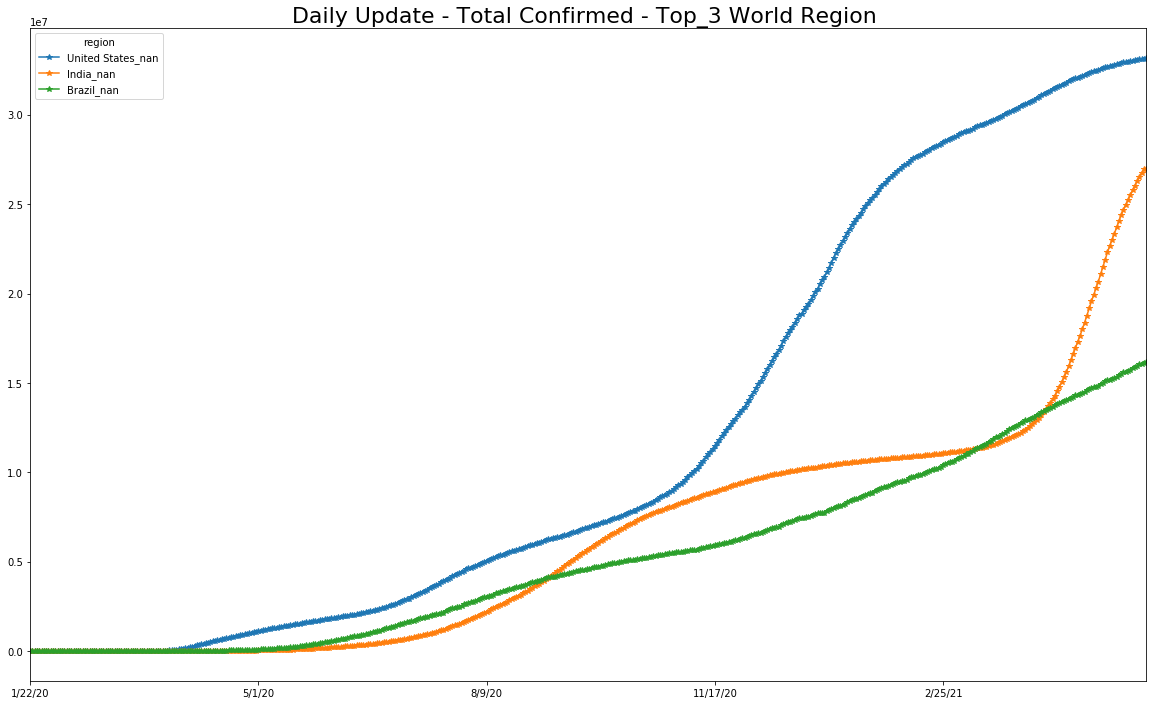

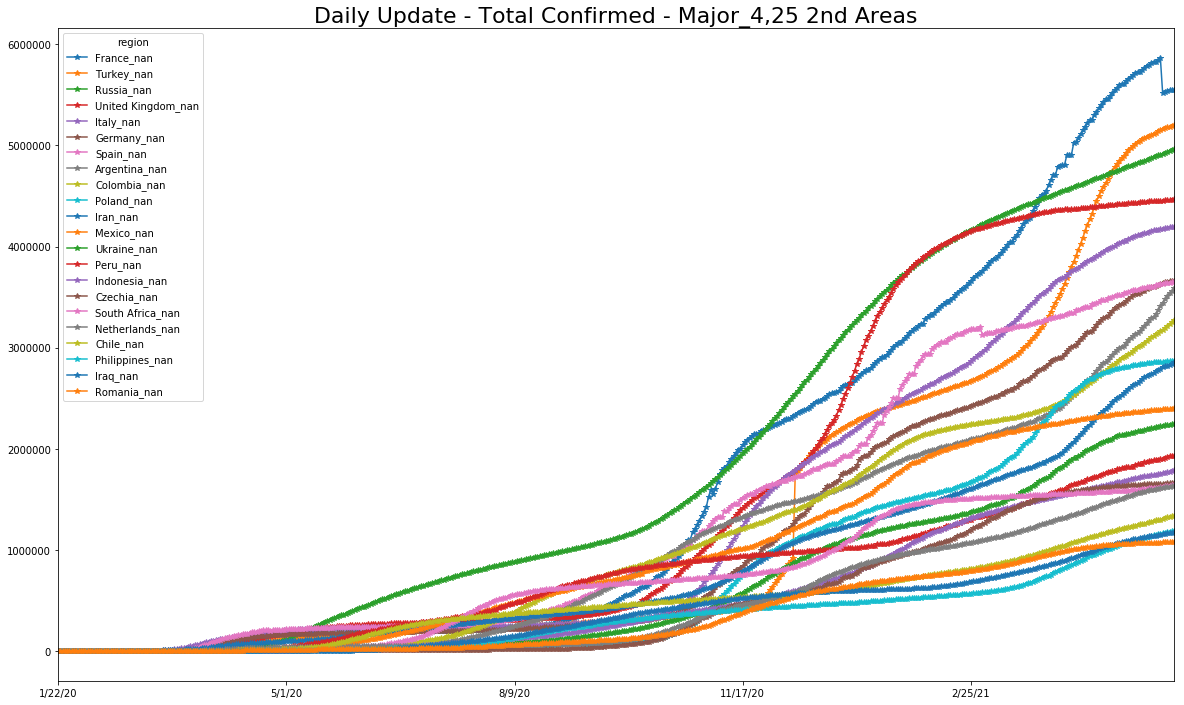

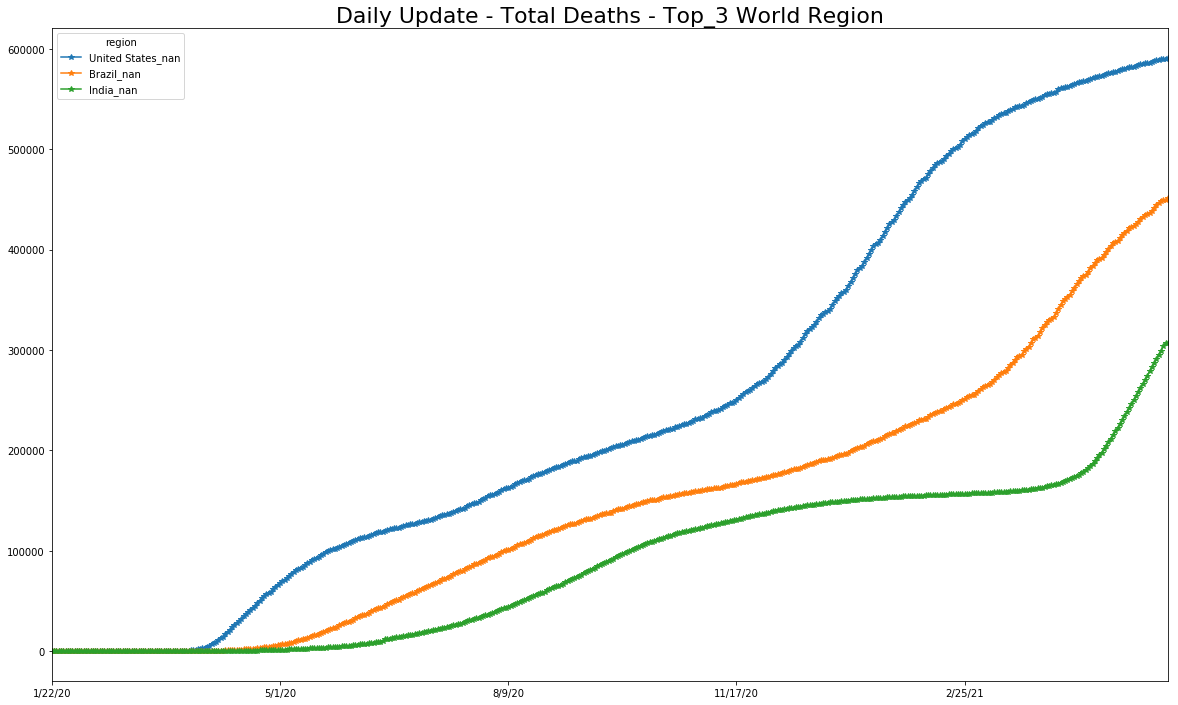

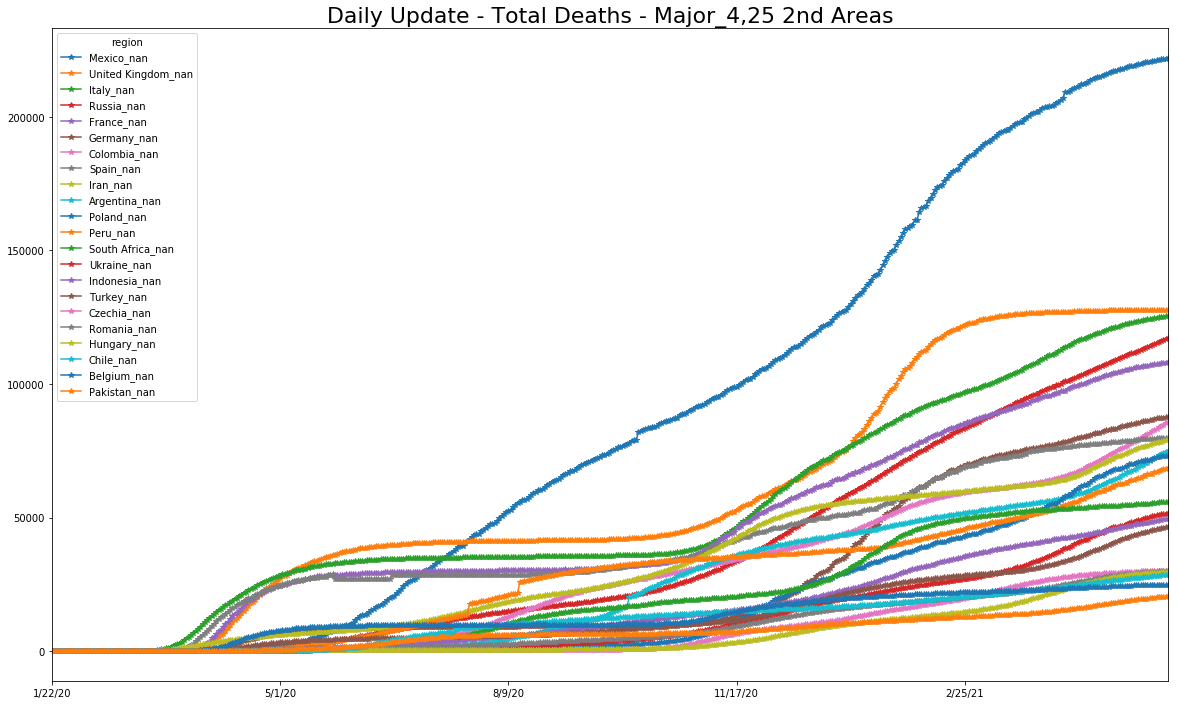

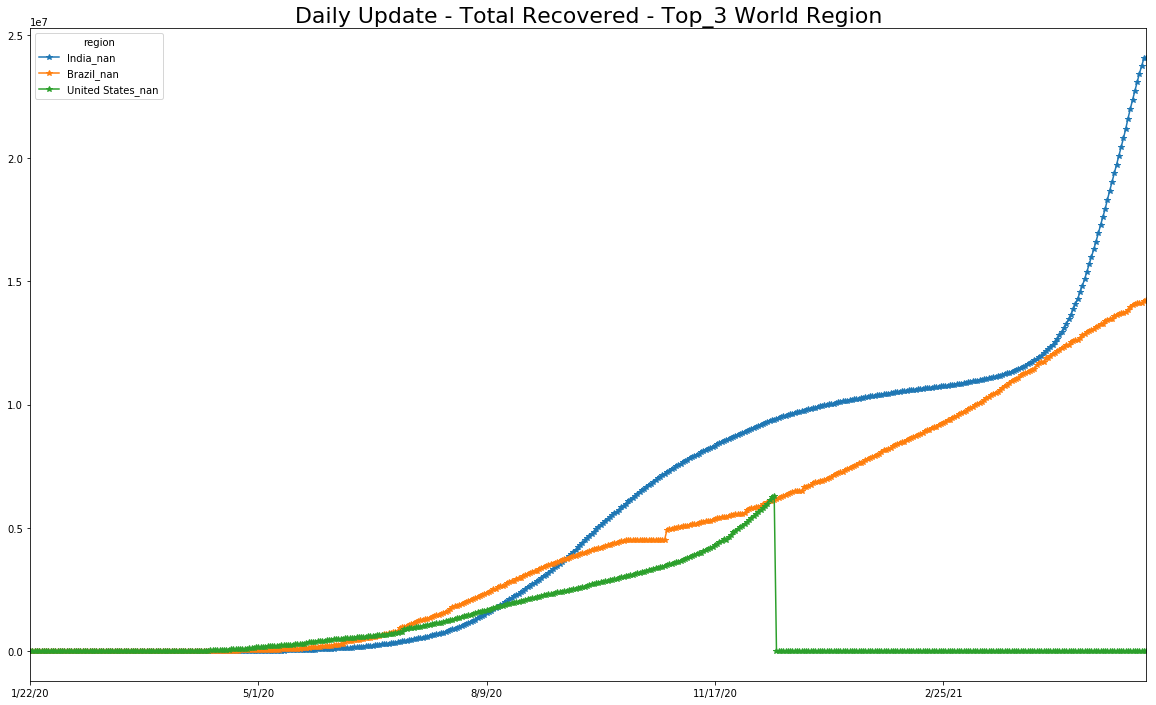

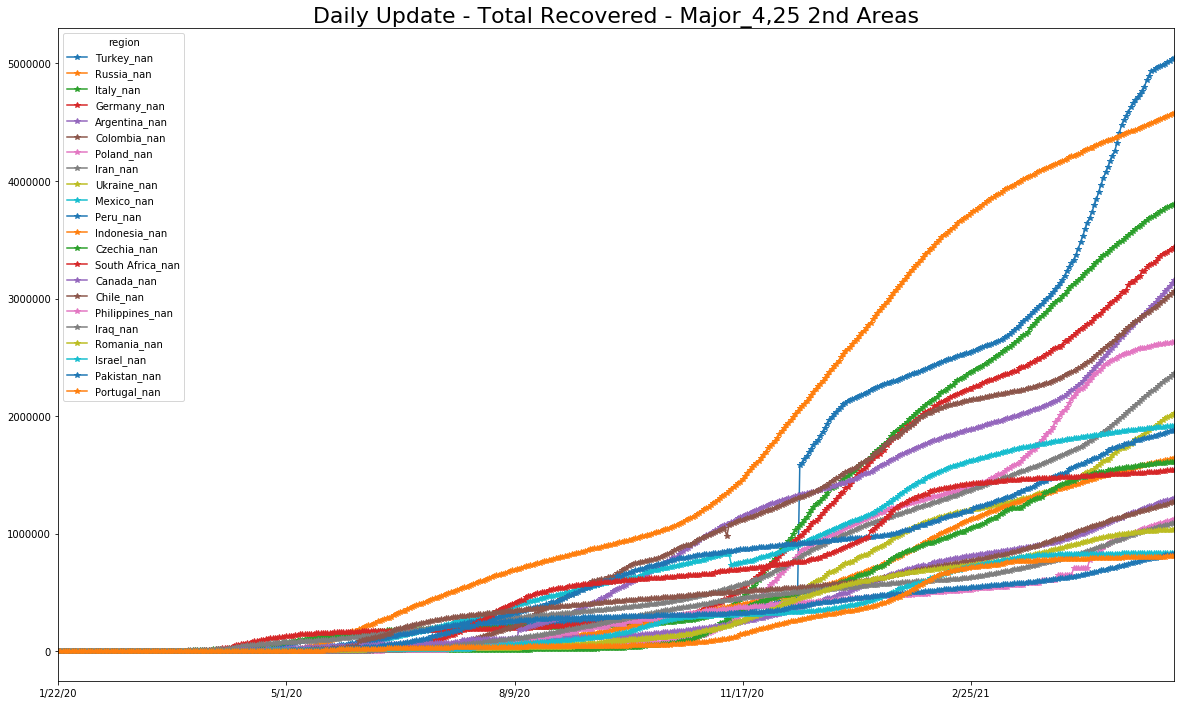

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/05/26


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
## DROP_N=15
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6522914         1808           47287            0   
9/14/20  ...            6557342         1812           47836            0   
9/15/20  ...            6596849         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 275 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
5/22/21            65486       132176       126651        13569       32149   
5/23/21            65728       132209       126860        13569       32441   
5/24/21            66275       132215       127107        13569       32623   
5/25/21            66903       132229       127361        13664       32933   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
5/22/21                     1257        3514683       221880   
5/23/21                     1257        3539484       221948   
5/24/21                     1258        3562135       221982   
5/25/21                     1258        3586736       222139   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
5/22/21                                     124                       5570   
5/23/21                                     124                       5572   
5/24/21                                     124                       5574   
5/25/21                                     124                       5576   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
5/22/21  ...           33104884       262009           98164            4   
5/23/21  ...           33117737       265098           98451            4   
5/24/21  ...           33143662       267888           98657            4   
5/25/21  ...           33165820       271859           98849            4   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
5/22/21         222052         5119                  305201       6649   
5/23/21         223345         5275                  305201       6658   
5/24/21         224819         5404                  305777       6662   
5/25/21         226136         5931                  306334       6670   

region   Zambia_nan  Zimbabwe_nan  
5/22/21       93106         38679  
5/23/21       93201         38682  
5/24/21       93279         38696  
5/25/21       93428         38706  

[4 rows x 275 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
71906 2021-04-27     Zimbabwe_nan      38164            16            57   
71907 2021-04-28     Zimbabwe_nan      38191            62           100   
71908 2021-04-29     Zimbabwe_nan      38235            27           105   
71909 2021-04-30     Zimbabwe_nan      38257            44           133   
71910 2021-05-01     Zimbabwe_nan      38260            22            93   
71911 2021-05-02     Zimbabwe_nan      38281             3            69   
71912 2021-05-03     Zimbabwe_nan      38293            21            46   
71913 2021-05-04     Zimbabwe_nan      38327            12            36   
71914 2021-05-05     Zimbabwe_nan      38357            34            67   
71915 2021-05-06     Zimbabwe_nan      38398            30            76   
71916 2021-05-07     Zimbabwe_nan      38403            41           105   
71917 2021-05-08     Zimbabwe_nan      38414             5            76   
71918 2021-05-09     Zimbabwe_nan      38419            11            57   
71919 2021-05-10     Zimbabwe_nan      38433             5            21   
71920 2021-05-11     Zimbabwe_nan      38448            14            30   
71921 2021-05-12     Zimbabwe_nan      38466            15            34   
71922 2021-05-13     Zimbabwe_nan      38491            18            47   
71923 2021-05-14     Zimbabwe_nan      38535            25            58   
71924 2021-05-15     Zimbabwe_nan      38554            44            87   
71925 2021-05-16     Zimbabwe_nan      38560            19            88   
71926 2021-05-17     Zimbabwe_nan      38572             6  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
71935 2021-05-26  Zimbabwe_nan          0            10            27   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
71935           111         100.025868         100.069831         100.287628   

       last_day  kalman_prediction  population  infected_rate  min  max  
71935     38706            38727.0    14862924       0.000026  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
71935 2021-05-26  Zimbabwe_nan          0            10            27   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
71935           111         100.025868         100.069831         100.287628   

       last_day  kalman_prediction  population  infected_rate  min  max  
71935     38706            38727.0    14862924       0.000026  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
70397  2021-05-24  Zimbabwe_nan      38696             3            47   
70398  2021-05-25  Zimbabwe_nan      38706            14            32   
70399  2021-05-26  Zimbabwe_nan          0            10            27   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
70397           122         100.007782         100.121677         100.316416   
70398           124         100.036218         100.082790         100.321503   
70399           111         100.025868         100.069831         100.287628   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
70397                38682  ...    14862924       0.000026  NaN  NaN   
70398                38696  ...    14862924       0.000026  NaN  NaN   
70399                38706  ...    14862924       0.000026  NaN  NaN   

       population_percentage : infected_rate confirmed  \
70397                                         0.002603   
70398                                         0.002604   
70399                                         0.002604   

       population_percentage : factor 9/10 infected_rate confirmed  \
70397                                           0.023424             
70398                                           0.023432             
70399                                           0.023438             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
70397                    27.0                           1.816601   
70398                    23.0                           1.547475   
70399                    21.0                           1.412912   

       delta : roling 7day AVG  \
70397                17.428571   
70398                17.714286   
70399                15.857143   

       delta : aprox 14-day case notification rate per 100k hab  
70397                                           1.641669         
70398                                           1.668581         
70399                                           1.493650         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse            mae
265  United States_nan  4.325135e+12  2.079696e+06  156495.396078


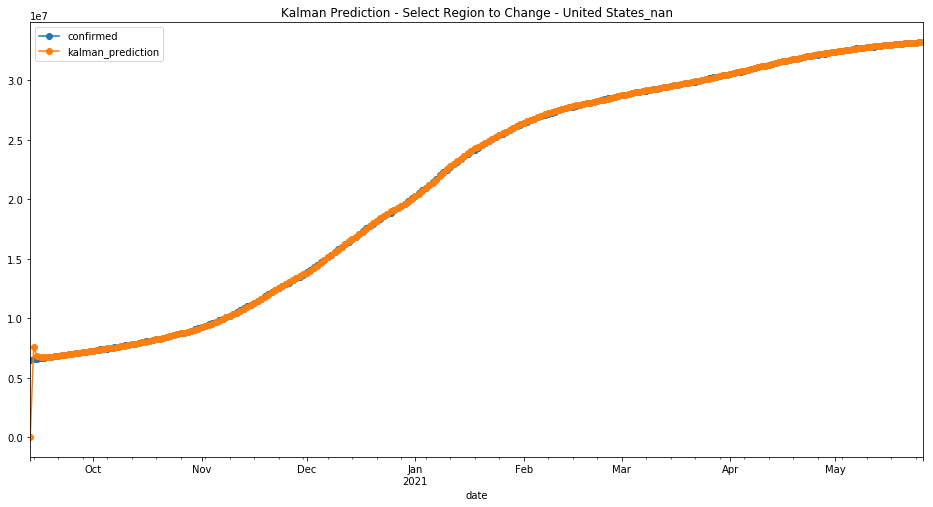

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
214  Russia_nan  9.694744e+10  311363.842358  21772.709804


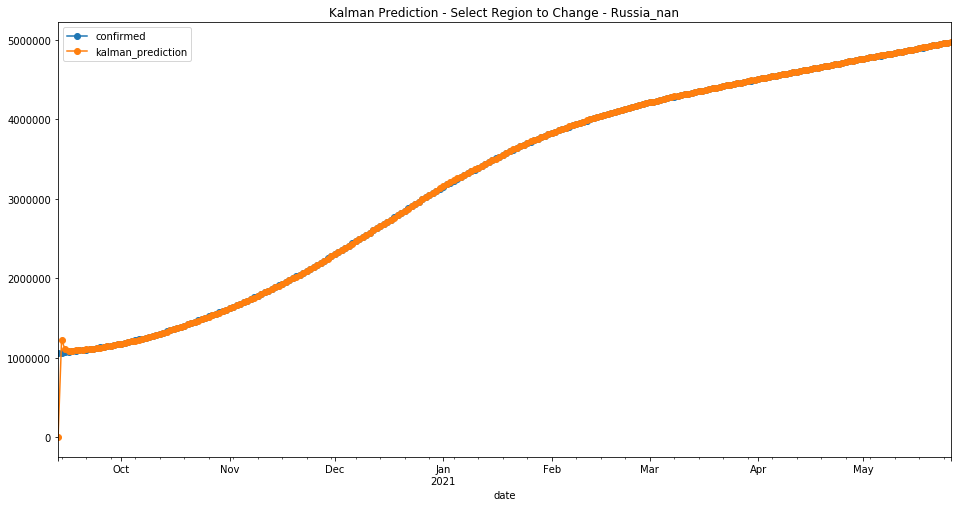

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse           mae
30  Brazil_nan  1.039357e+12  1.019489e+06  86603.345098


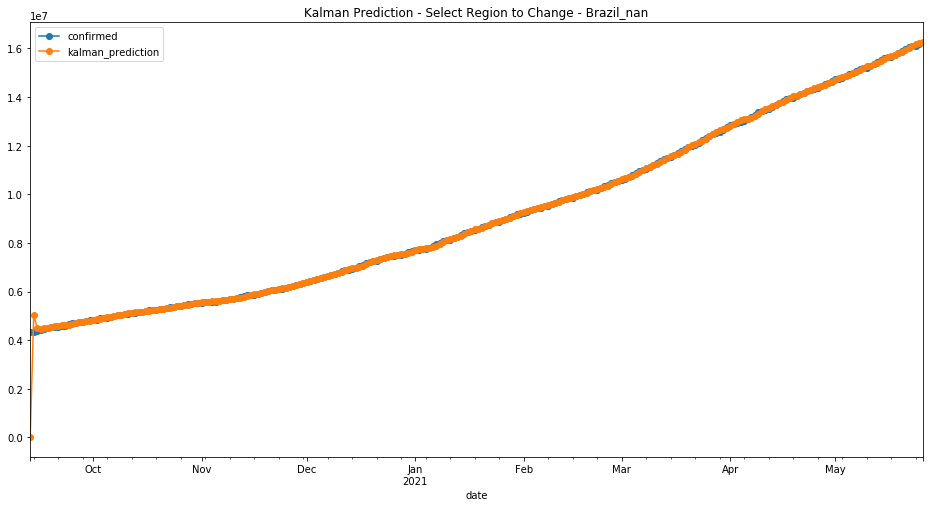

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse           rmse           mae
264  United Kingdom_nan  7.838366e+10  279970.824847  22048.062745


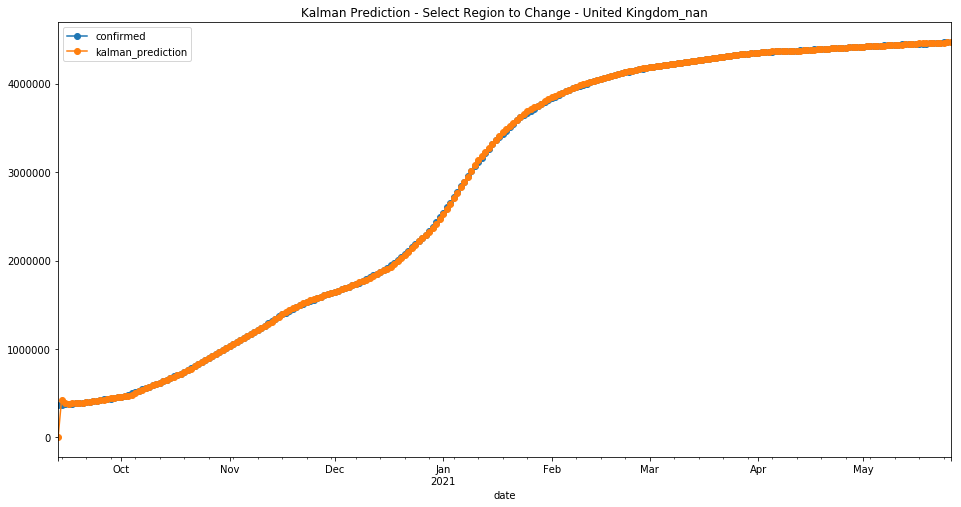

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpp8q3ddsr
  JVM stdout: /tmp/tmpp8q3ddsr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpp8q3ddsr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 6 months and 29 days !!!
H2O cluster name:           H2O_from_python_unknownUser_eyoiw3
H2O cluster total nodes:    1
H2O cluster free memory:    3.541 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-05-18
last_train_date= 2021-05-25
first_bootstrap_date= 2021-05-17
boost_bootstrap_date= 2021-05-22
first_test_date= 2021-05-16
last_test_date= 2021-05-26
first_valid_date= 2021-05-24


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    63872.0      63598 2021-05-17  Afghanistan_nan
1    63941.0      63819 2021-05-18  Afghanistan_nan
2    64127.0      64122 2021-05-19  Afghanistan_nan
3    64400.0      64575 2021-05-20  Afghanistan_nan
4    64846.0      65080 2021-05-21  Afghanistan_nan
5    65371.0      65486 2021-05-22  Afghanistan_nan
6    65820.0      65728 2021-05-23  Afghanistan_nan
7    66119.0      66275 2021-05-24  Afghanistan_nan
8    66678.0      66903 2021-05-25  Afghanistan_nan
9    67304.0          0 2021-05-26  Afghanistan_nan
10  132147.0     132032 2021-05-17      Albania_nan
11  132157.0     132071 2021-05-18      Albania_nan
12  132197.0     132095 2021-05-19      Albania_nan
13  132214.0     132118 2021-05-20      Albania_nan
14  132236.0     132153 2021-05-21      Albania_nan
15  132270.0     132176 2021-05-22      Albania_nan
16  132289.0     132209 2021-05-23      Albania_nan
17  132324.0     132215 2021-05-24      Albania_nan
18  132324.0     132229 2021-05-25      Albania_nan
19  132341.0          0 2021-05-26      Albania_nan
20  125609.0     125485 2021-05-17      Algeria_nan
21  125774.0     125693 2021-05-18      Algeria_nan
22  125971.0     125896 2021-05-19      Algeria_nan
23  126171.0     126156 2021-05-20      Algeria_nan
24  126442.0     126434 2021-05-21      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  332328.0     332235 2021-05-22  Azerbaijan_nan
176  332673.0     332454 2021-05-23  Azerbaijan_nan
177  332876.0     332610 2021-05-24  Azerbaijan_nan
178  333019.0     332894 2021-05-25  Azerbaijan_nan
179  333298.0          0 2021-05-26  Azerbaijan_nan
180   11186.0      11225 2021-05-17     Bahamas_nan
181   11117.0      11278 2021-05-18     Bahamas_nan
182   11385.0      11321 2021-05-19     Bahamas_nan
183   11478.0      11396 2021-05-20     Bahamas_nan
184   11495.0      11396 2021-05-21     Bahamas_nan
185   11597.0      11396 2021-05-22     Bahamas_nan
186   11594.0      11396 2021-05-23     Bahamas_nan
187   11570.0      11499 2021-05-24     Bahamas_nan
188   11537.0      11597 2021-05-25     Bahamas_nan
189   11644.0          0 2021-05-26     Bahamas_nan
190  202510.0     202556 2021-05-17     Bahrain_nan
191  204057.0     204524 2021-05-18     Bahrain_nan
192  206121.0     206878 2021-05-19     Bahrain_nan
193  208499.0     209293 2021-05-20     Bahrain_nan
194  210989.0     212151 2021-05-21     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220   377444.0     377532 2021-05-17  Belarus_nan
221   378600.0     378711 2021-05-18  Belarus_nan
222   379870.0     380089 2021-05-19  Belarus_nan
223   381312.0     381546 2021-05-20  Belarus_nan
224   382790.0     383302 2021-05-21  Belarus_nan
225   384630.0     384773 2021-05-22  Belarus_nan
226   386104.0     386025 2021-05-23  Belarus_nan
227   387443.0     386978 2021-05-24  Belarus_nan
228   388375.0     387818 2021-05-25  Belarus_nan
229   389179.0          0 2021-05-26  Belarus_nan
230  1034341.0    1032895 2021-05-17  Belgium_nan
231  1034932.0    1034714 2021-05-18  Belgium_nan
232  1036792.0    1038514 2021-05-19  Belgium_nan
233  1040772.0    1041706 2021-05-20  Belgium_nan
234  1043769.0    1044612 2021-05-21  Belgium_nan
235  1046829.0    1047128 2021-05-22  Belgium_nan
236  1049479.0    1048881 2021-05-23  Belgium_nan
237  1051281.0    1049822 2021-05-24  Belgium_nan
238  1052080.0    1050677 2021-05-25  Belgium_nan
239  1052817.0          0 2021-05-26  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  4334812287.494089
# MSE on the validation data =  19829484659191.297
# R^2 on the training data =  0.9997972758465441
# R^2 on the validation data =  0.4412959721192209


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1622005390613_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 4334812287.494089
RMSE: 65839.29136537004
MAE: 7305.962570462164
RMSLE: 0.1892379920673656
Mean Residual Deviance: 4334812287.494089

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 19829484659191.297
RMSE: 4453030.951968703
MAE: 1167765.9929331644
RMSLE: 7.711908418581233
Mean Residual Deviance: 19829484659191.297
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse    validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  -----------------  ------------------  ---------------------
     2021-05-26 05:03:18  0.062 sec   0.0                nan                 nan                 nan                  nan                nan                 nan
     2021-05-26 05:03:18  0.557 sec   1.0                140865.83584397813  21882.470798053564  19843183708.02259    4475920.490796488  1166731.1936321086  20033864239931.87
     2021-05-26 05:03:19  1.029 sec   2.0                124034.71636003704  19887.277575127166  15384610862.514841   4497808.915527719  1166152.3572426187  20230285040600.637
     2021-05-26 05:03:19  1.138 sec   3.0                115108.9602025492   19997.813287922967  13250072718.912058   4502934.372603071  1169291.830910256   20276417963970.21
     2021-05-26 05:03:19  1.226 sec   4.0                112413.5171313377   19409.801823587444  12636798833.837555   4504504.113793144  1167736.5501956425  20290557311179.36
---  ---                  ---         ---                ---                 ---                 ---                  ---                ---                 ---
     2021-05-26 05:03:34  16.192 sec  246.0              69231.03320123823   7863.129029676101   4792935958.11095     4462985.515039369  1170812.5826213905  19918239707451.227
     2021-05-26 05:03:38  20.216 sec  319.0              68245.69163952826   7640.609842621076   4657474427.357578    4449706.055455971  1168724.3375755367  19799883979961.535
     2021-05-26 05:03:42  24.264 sec  392.0              66746.36915434405   7533.15415466906    4455077795.2879715   4449802.639039844  1168974.0588591497  19800743526405.965
     2021-05-26 05:03:46  28.299 sec  463.0              66671.46862174291   7375.002451044428   4445084728.18005     4449270.087110529  1167583.5980992839  19796004308056.535
     2021-05-26 05:03:48  30.590 sec  500.0              65839.29136537004   7305.962570462164   4334812287.494089    4453030.951968703  1167765.9929331644  19829484659191.297


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  3.13295e+19            1                    0.340299
last_day           2.61884e+19            0.835902             0.284457
region             1.45479e+19            0.464351             0.158018
7_day_change       8.54123e+18            0.272626             0.0927744
3_day_change       4.60024e+18            0.146834             0.0499676
1_day_change       2.25722e+18            0.0720478            0.0245178
infected_rate      1.99791e+18            0.0637709            0.0217012
max                9.75012e+17            0.0311212            0.0105905
min                7.77158e+17            0.0248059            0.00844144
7_day_change_rate  4.92879e+17            0.0157321            0.00535362
3_day_change_rate  2.80059e+17            0.00893916           0.00304199
1_day_change_rate  7.70677e+16            0.00245991           0.000837106

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         3.132949e+19           1.000000    0.340299
1            last_day         2.618839e+19           0.835902    0.284457
2              region         1.454788e+19           0.464351    0.158018
3        7_day_change         8.541231e+18           0.272626    0.092774
4        3_day_change         4.600241e+18           0.146834    0.049968
5        1_day_change         2.257222e+18           0.072048    0.024518
6       infected_rate         1.997910e+18           0.063771    0.021701
7                 max         9.750120e+17           0.031121    0.010591
8                 min         7.771577e+17           0.024806    0.008441
9   7_day_change_rate         4.928786e+17           0.015732    0.005354
10  3_day_change_rate         2.800594e+17           0.008939    0.003042
11  1_day_change_rate         7.706774e+16           0.002460    0.000837

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


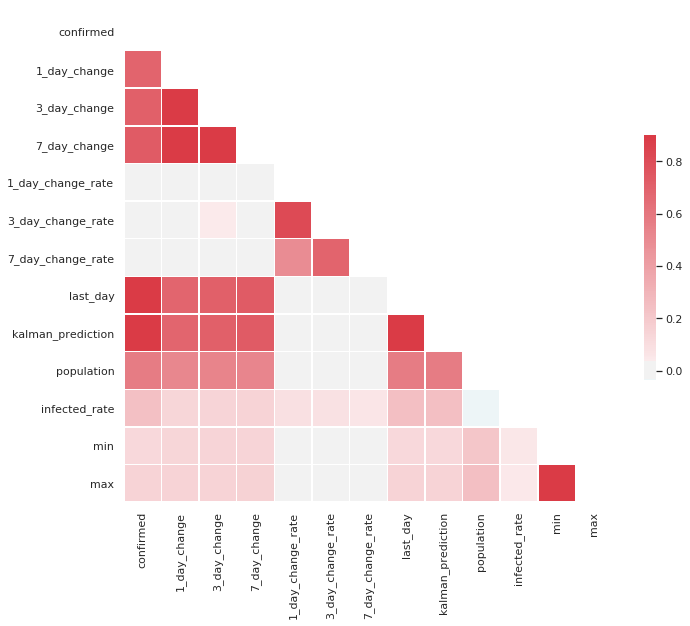

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.690018
3_day_change         0.716258
7_day_change         0.730808
1_day_change_rate    0.023638
3_day_change_rate    0.021271
7_day_change_rate    0.013863
last_day             0.994234
kalman_prediction    0.994452
population           0.570877
infected_rate        0.244787
min                  0.127234
max                  0.147680
Name: confirmed, dtype: float64


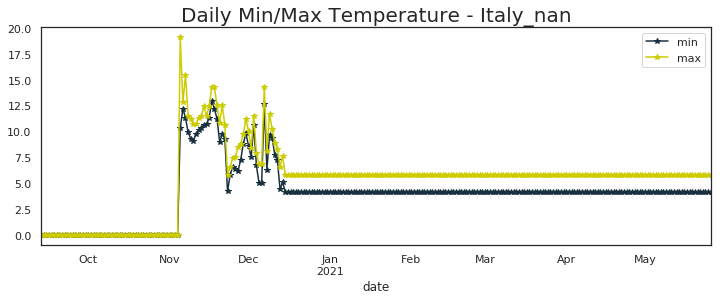

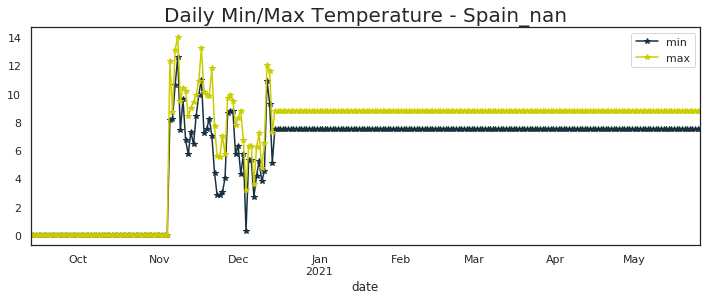

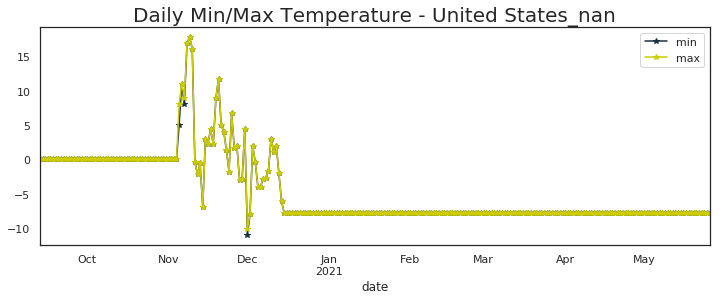

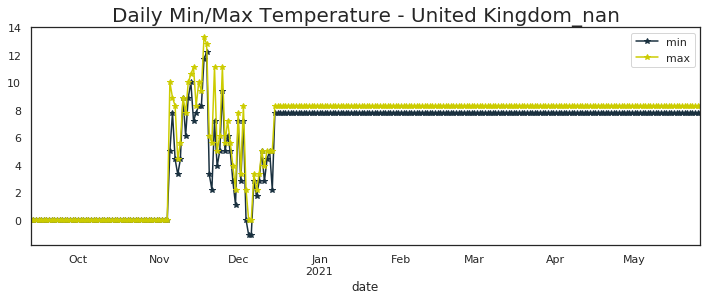

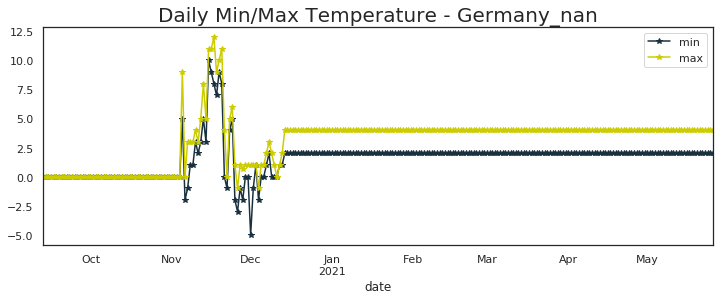

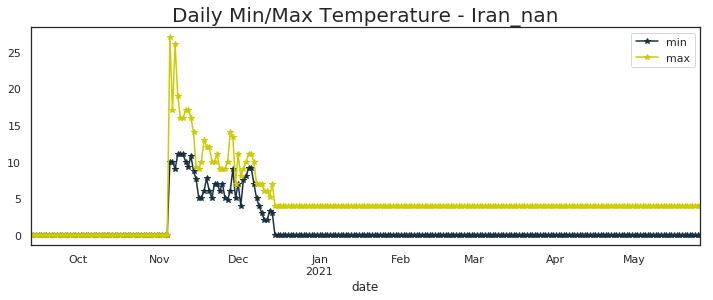

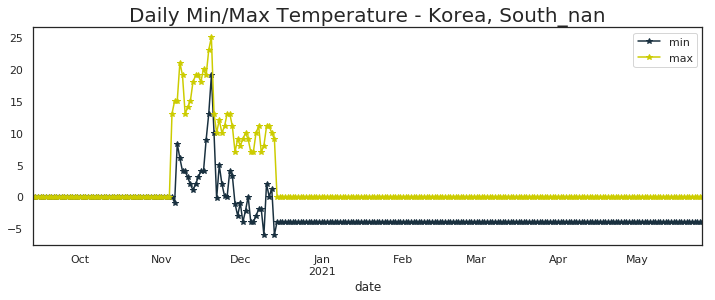

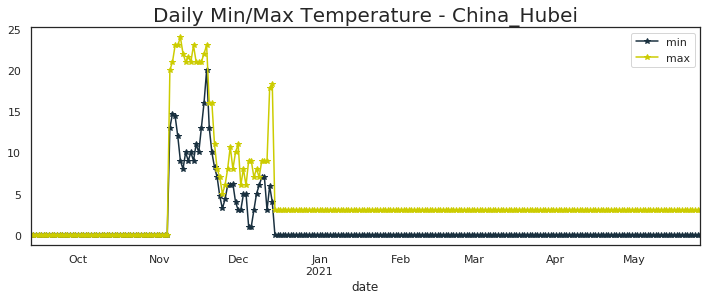

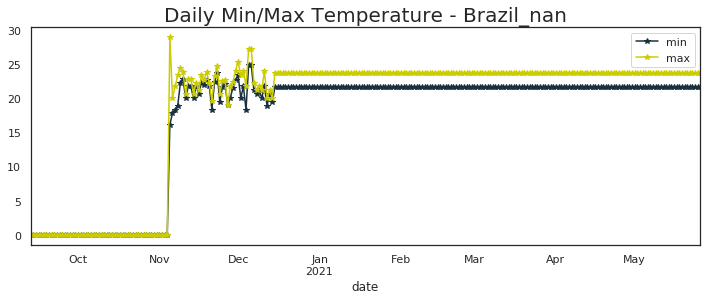

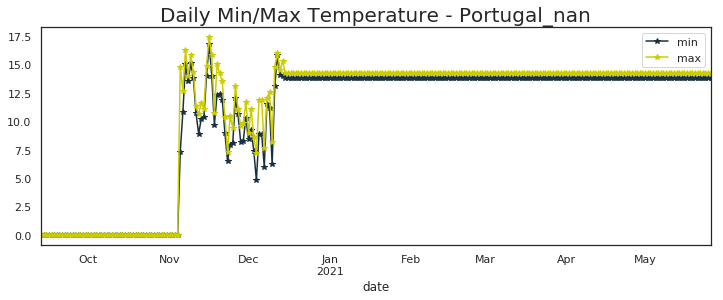

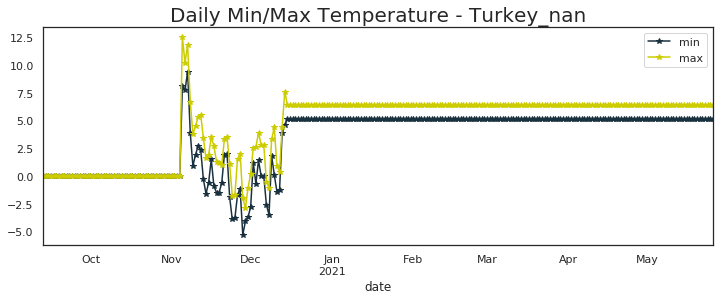

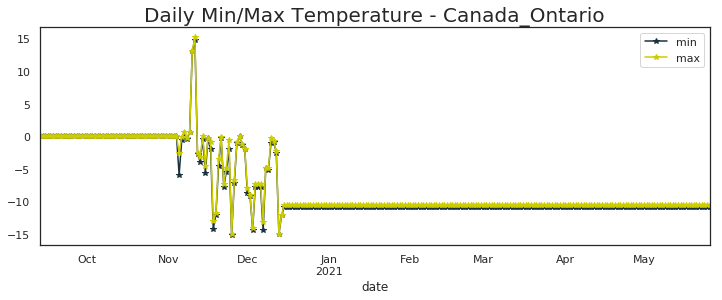

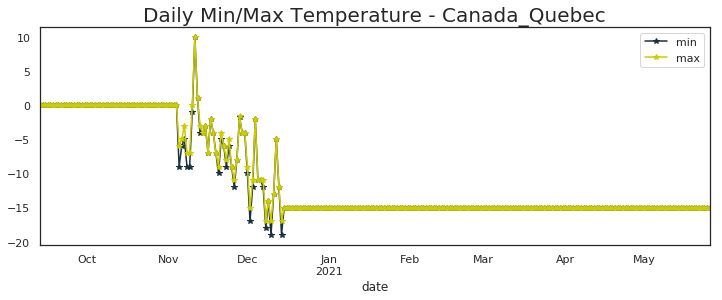

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
India_nan                   22.0  31.0
Brazil_nan                  24.8  28.9
France_nan                  12.1  13.3
Turkey_nan                   9.4  12.5
Russia_nan                   0.0   4.0
United Kingdom_nan          12.2  13.3
Italy_nan                   12.9  19.1
Germany_nan                 10.0  12.0
Spain_nan                   12.6  14.0
Argentina_nan                0.0   0.0
Colombia_nan                 0.0   0.0
Poland_nan                   8.9  10.6
Iran_nan                    11.0  27.0
Mexico_nan                  15.1  15.1
Ukraine_nan                  0.0   0.0
Peru_nan                    24.6  29.9
Indonesia_nan                0.0   0.0
Czechia_nan                  0.0   0.0
South Africa_nan             0.0   0.0
Netherlands_nan             14.4  16.1
Chile_nan                   18.0  22.0
Philippines_nan             

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

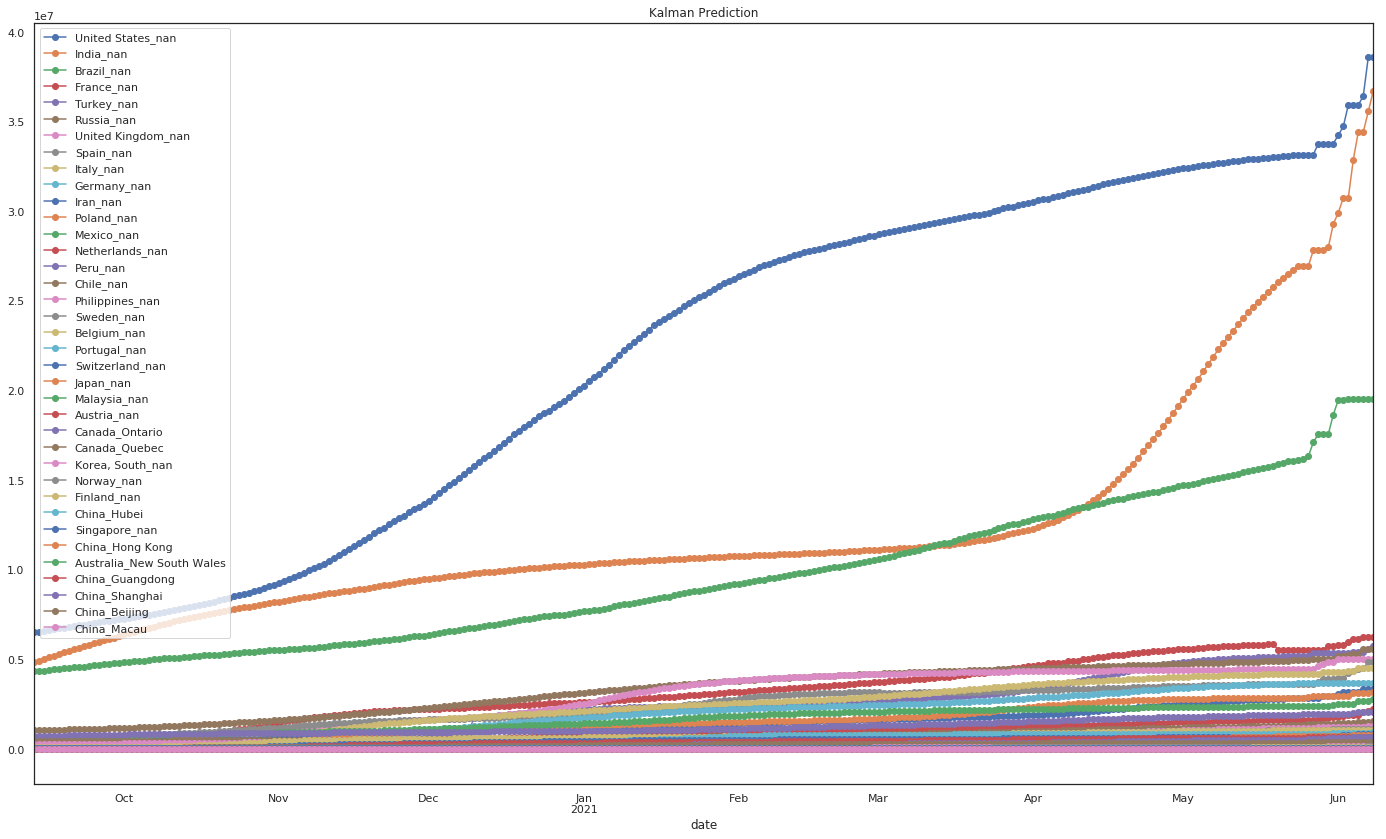

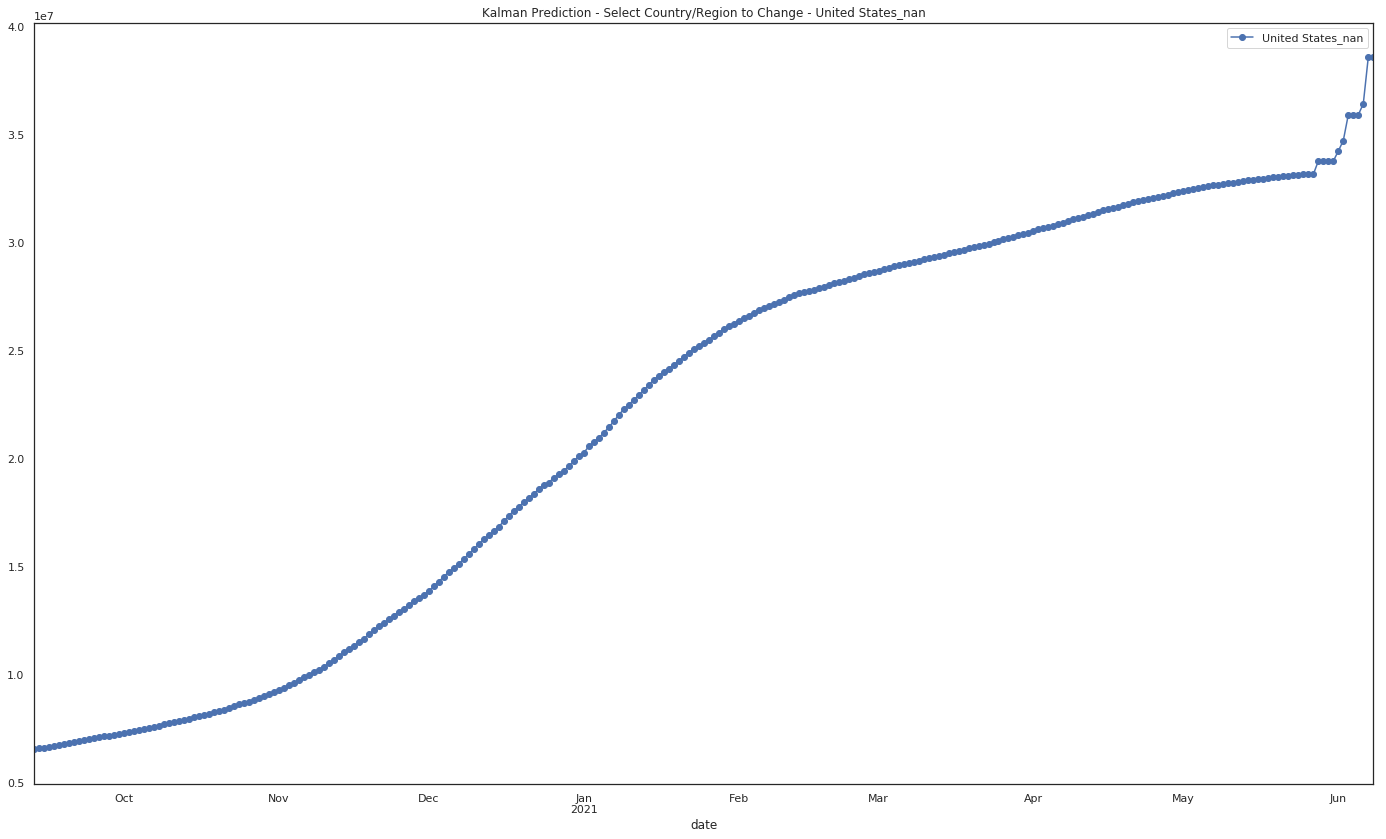

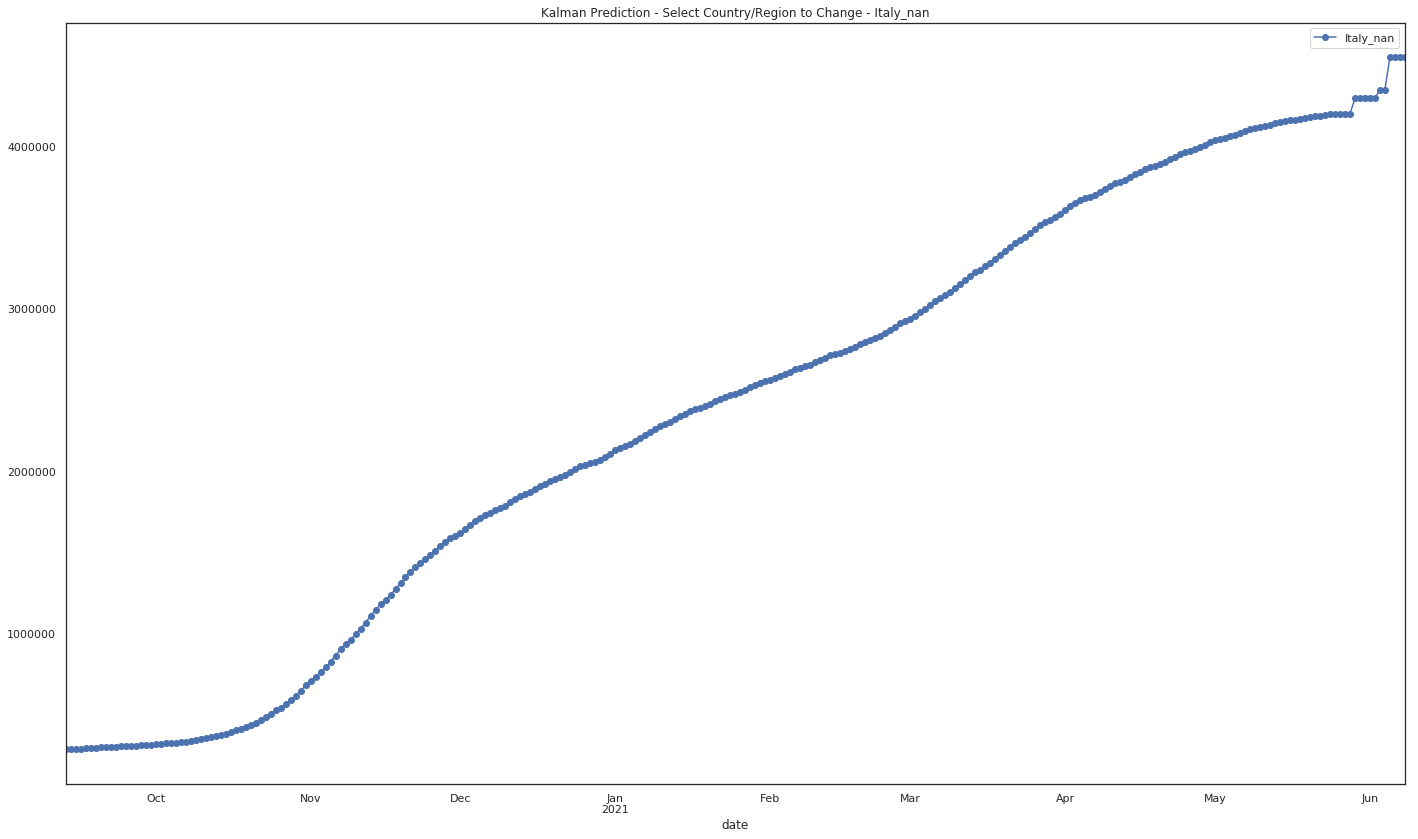

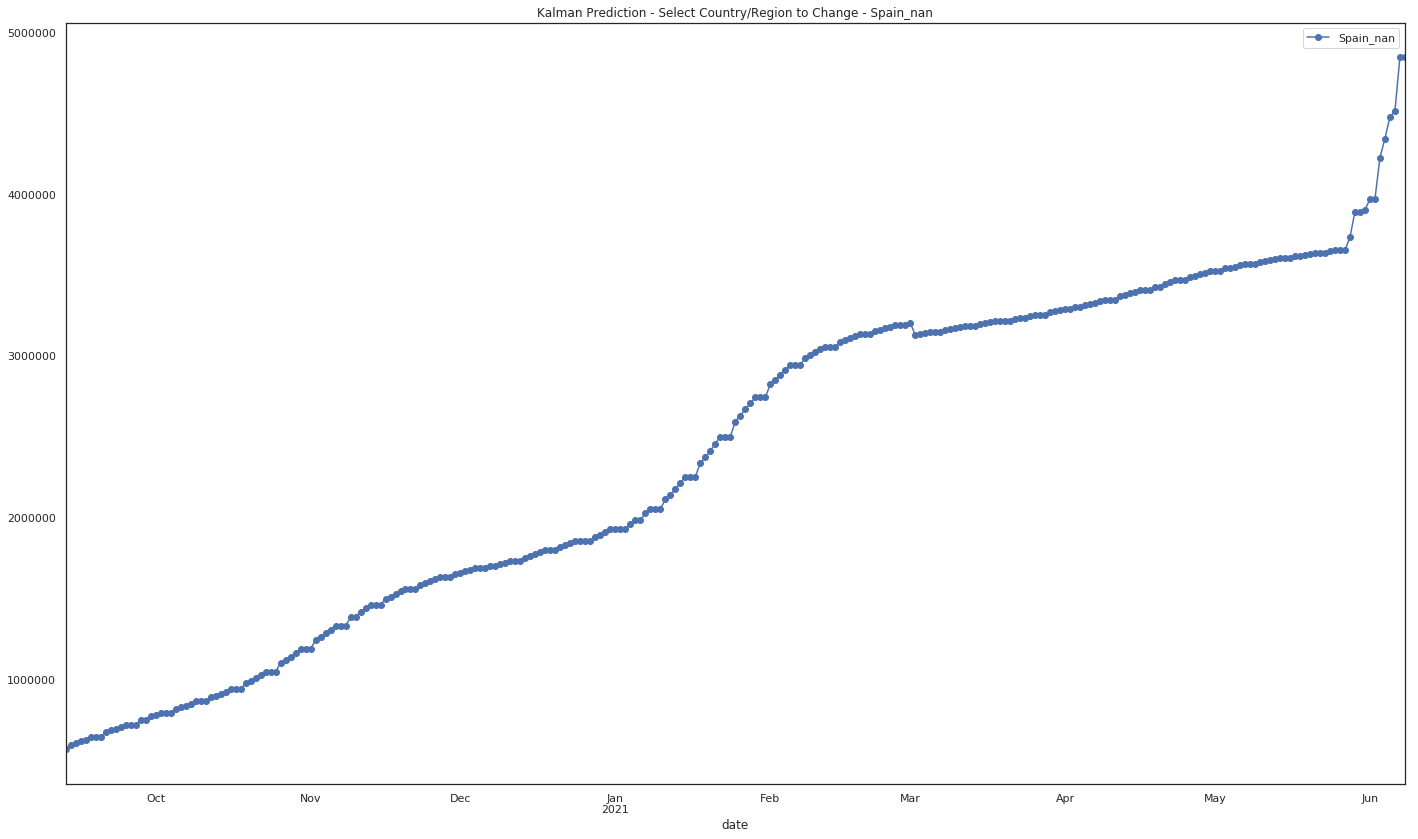

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


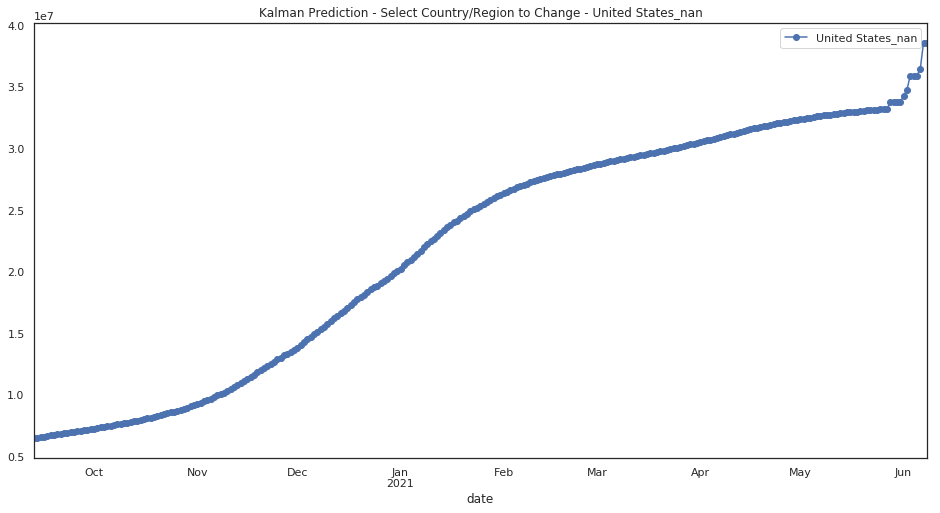

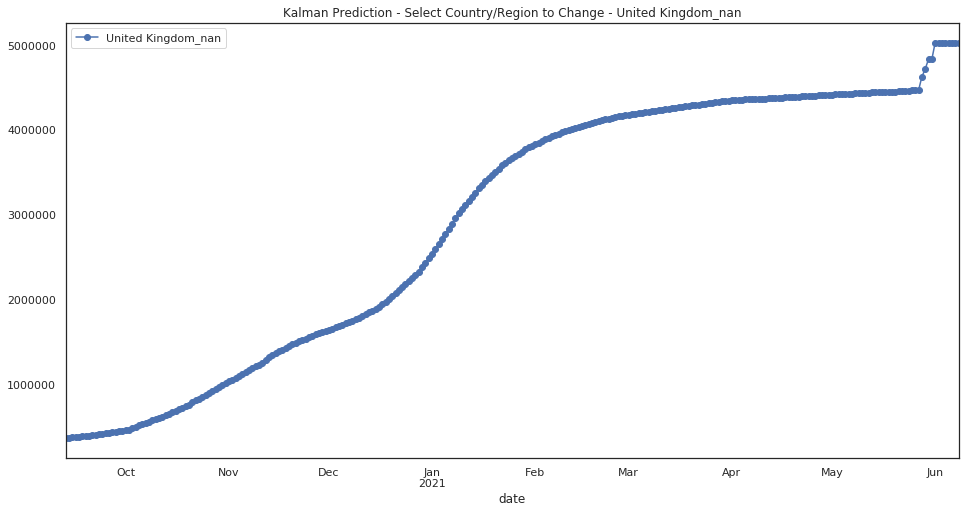

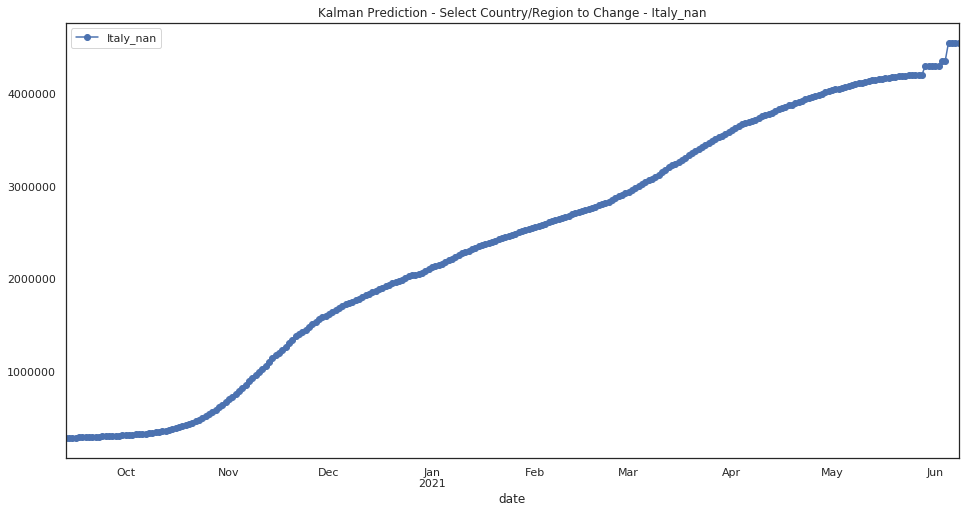

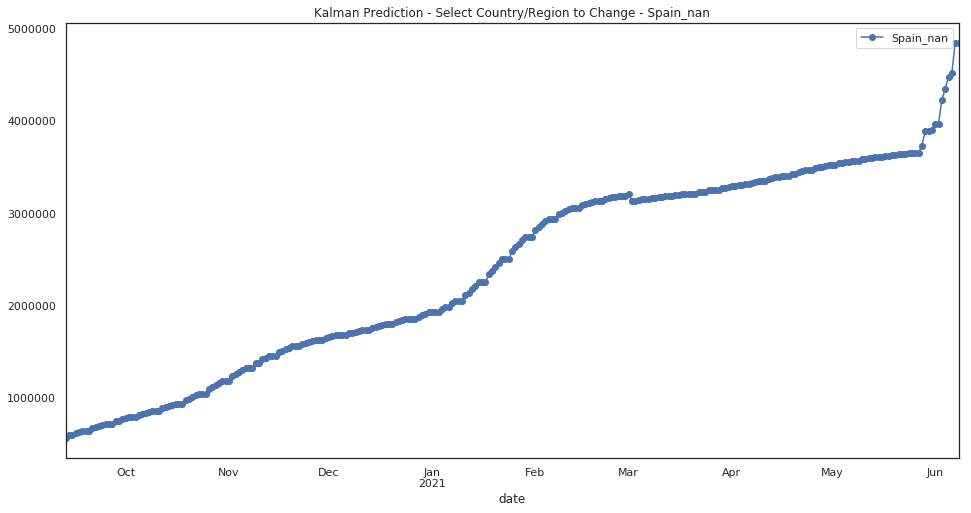

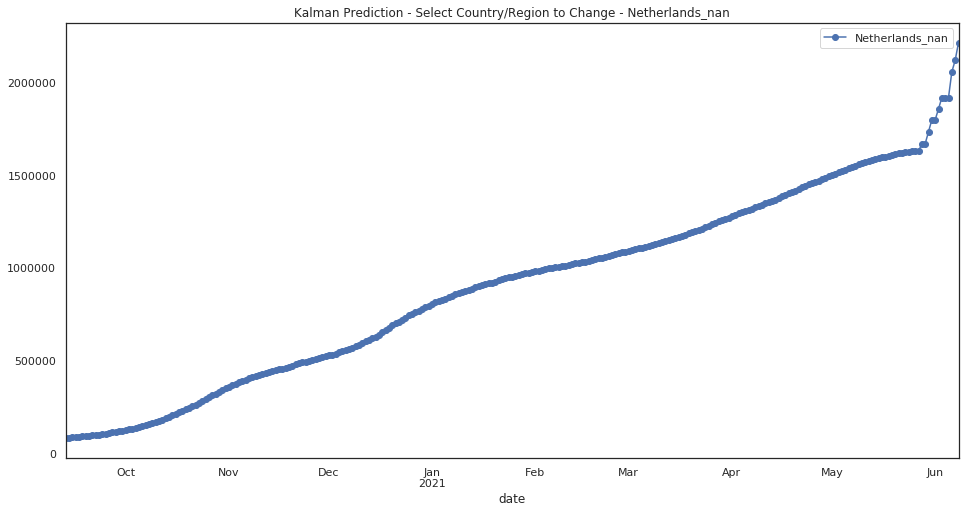

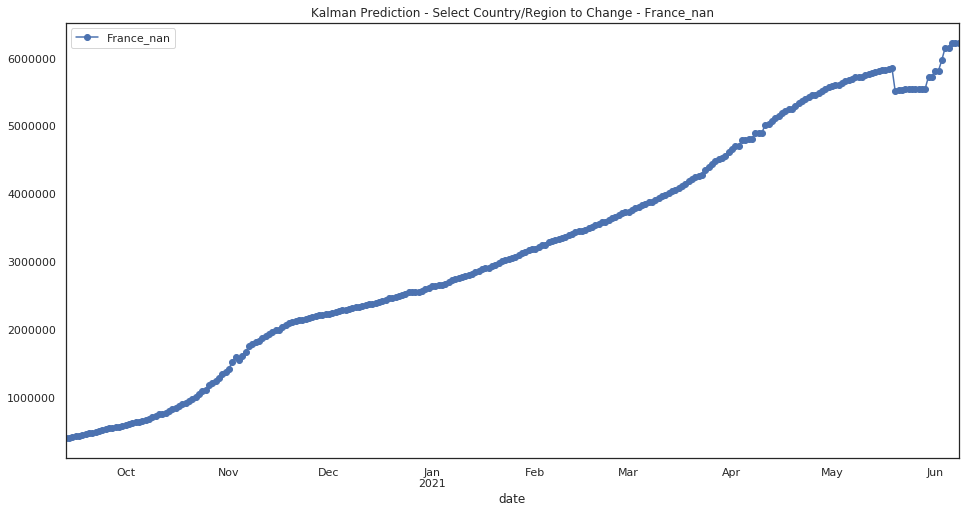

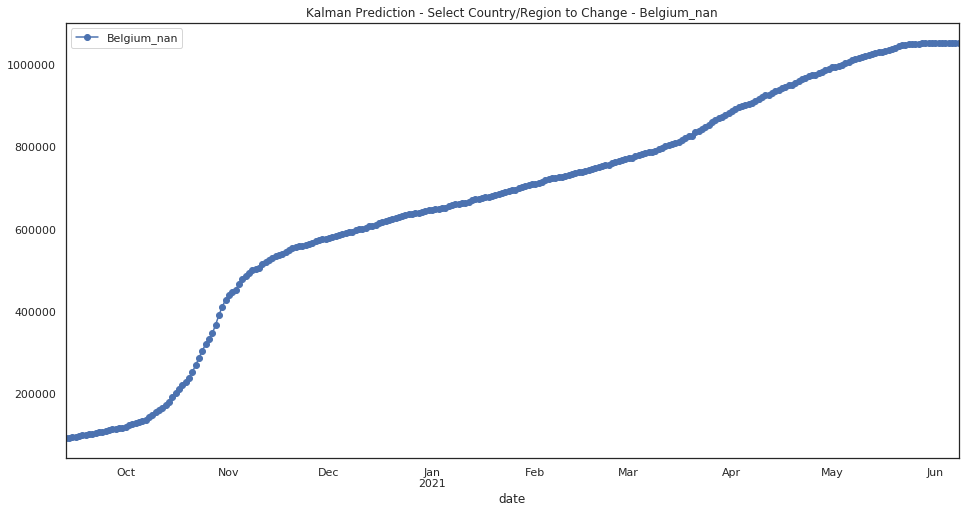

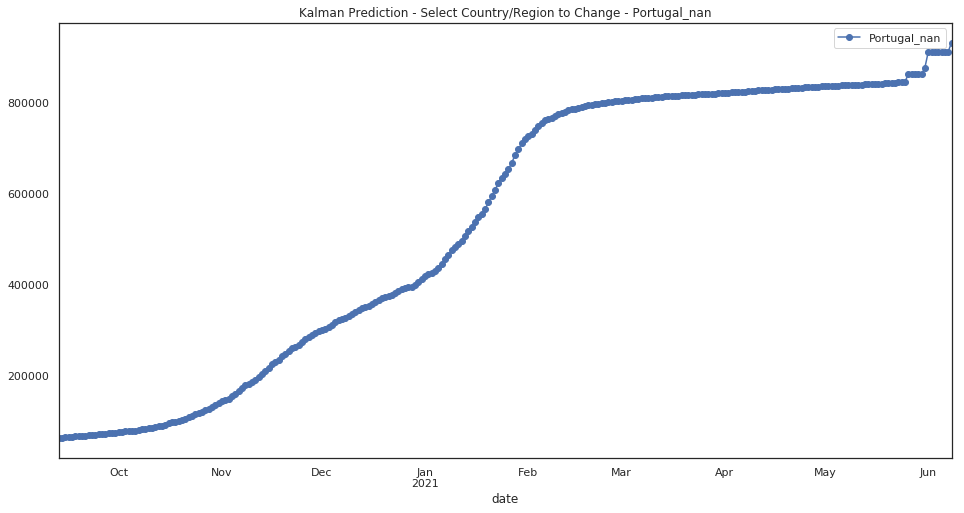

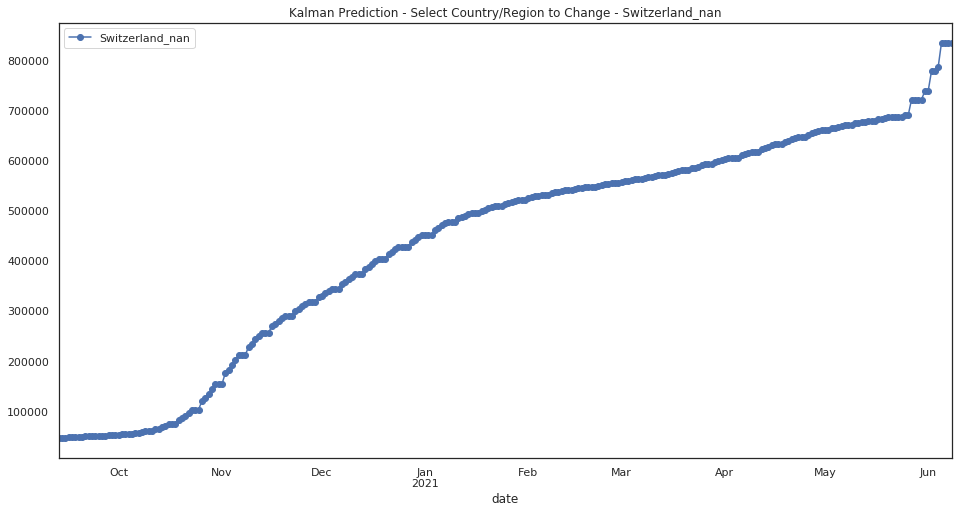

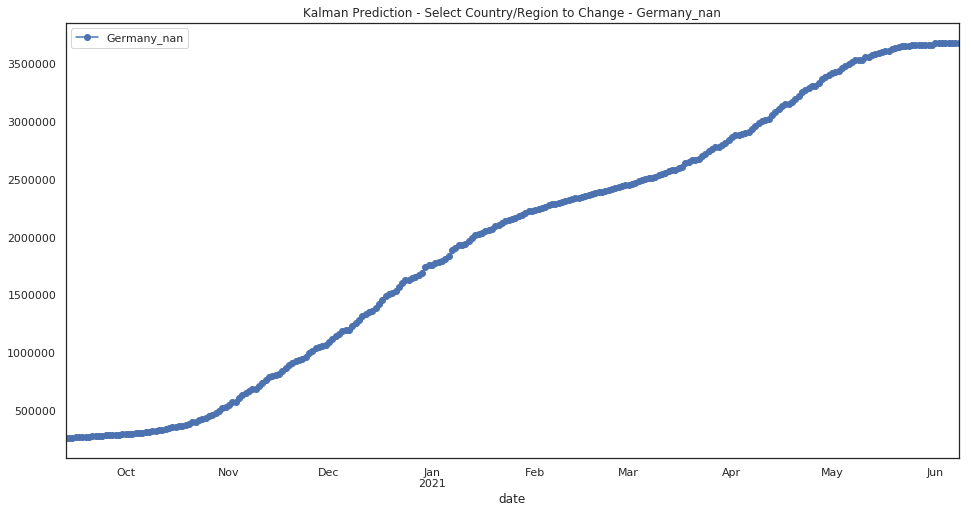

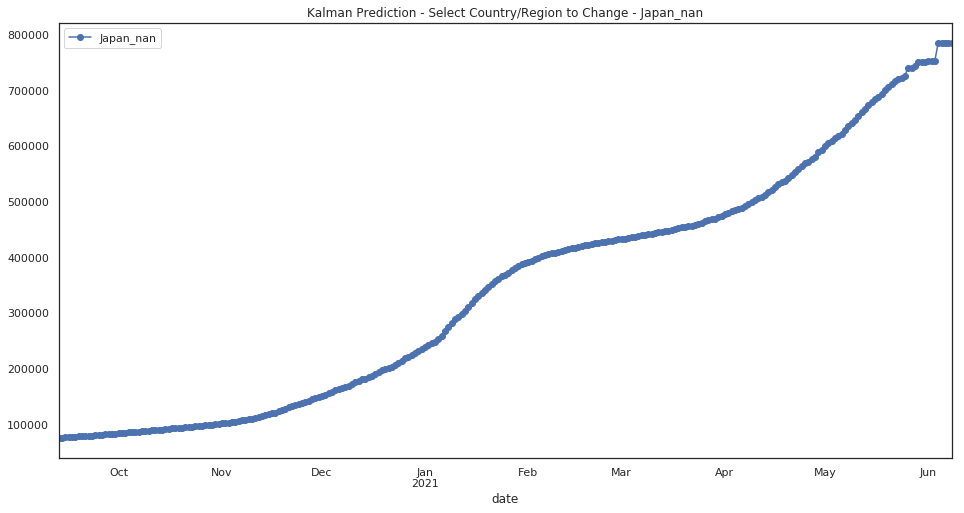

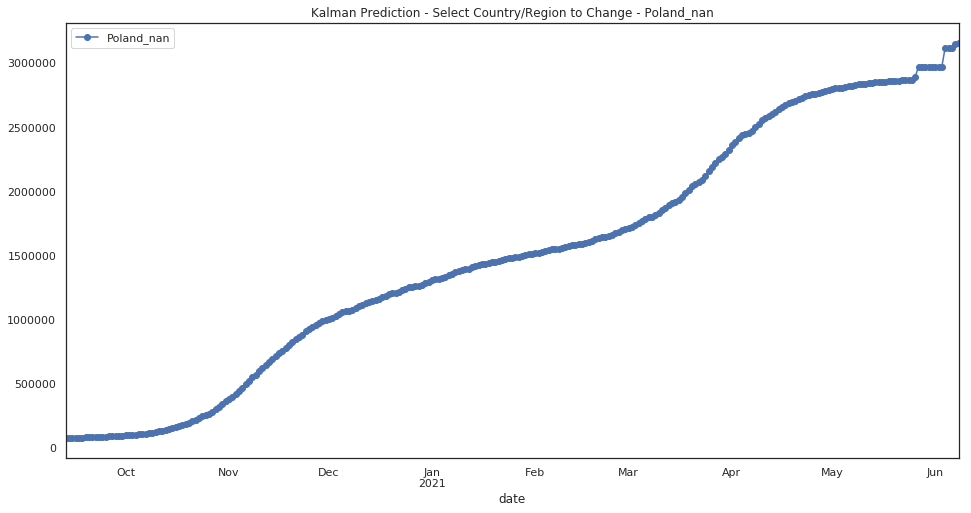

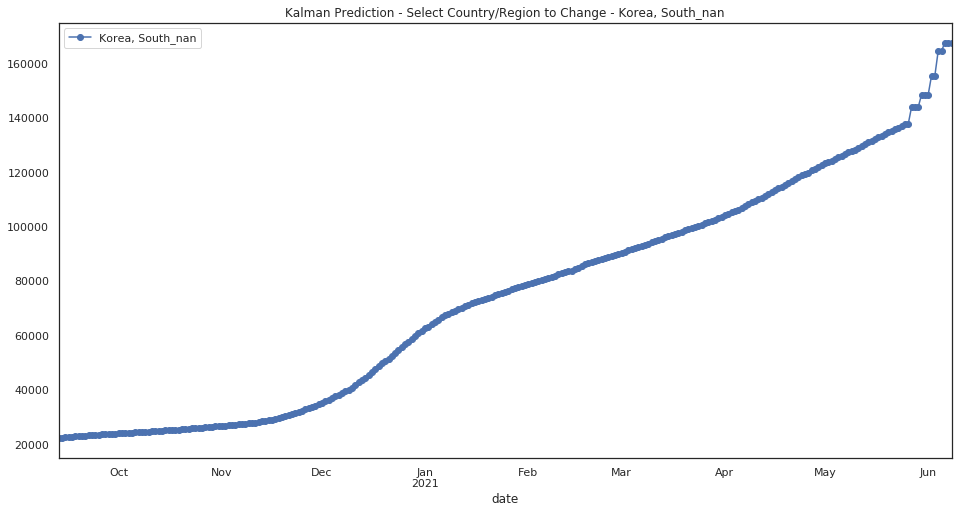

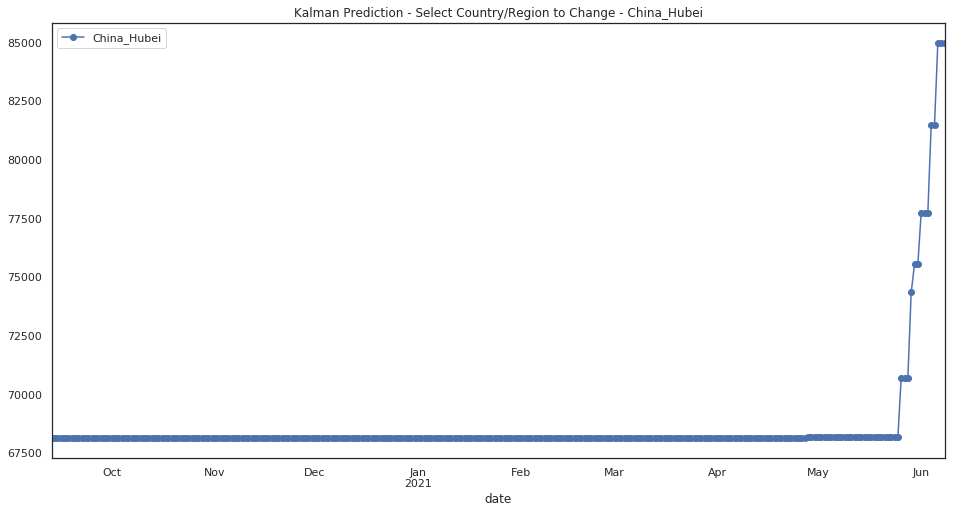

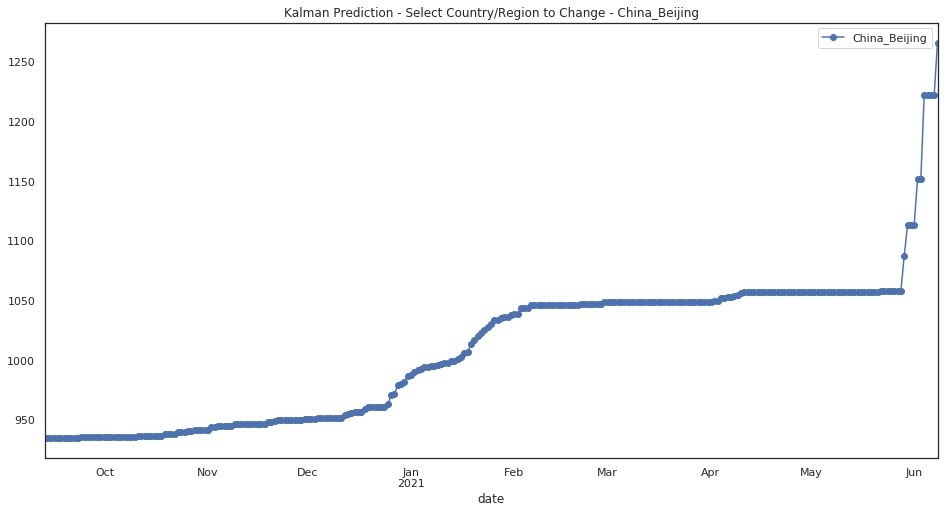

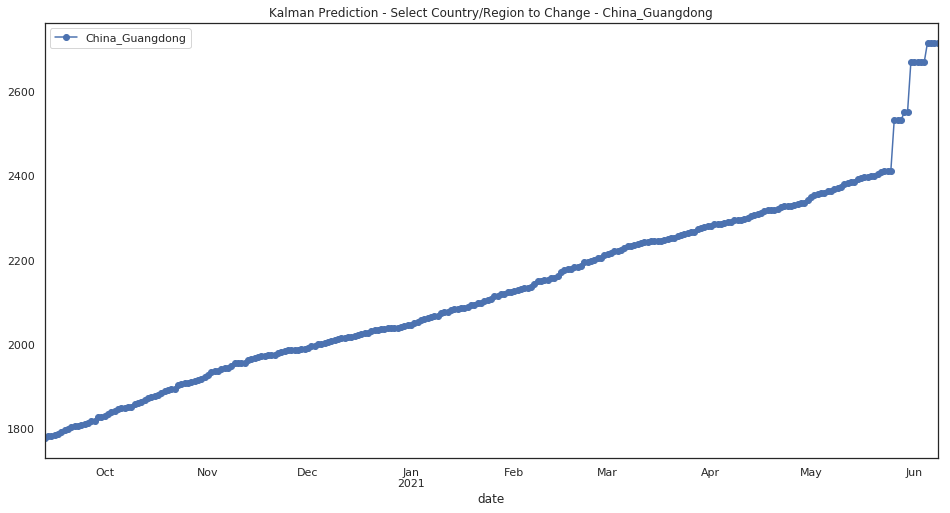

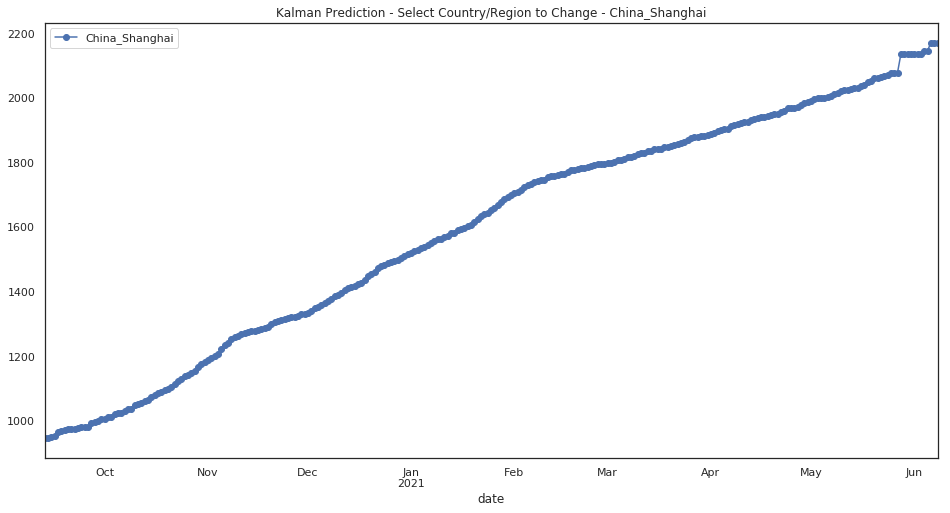

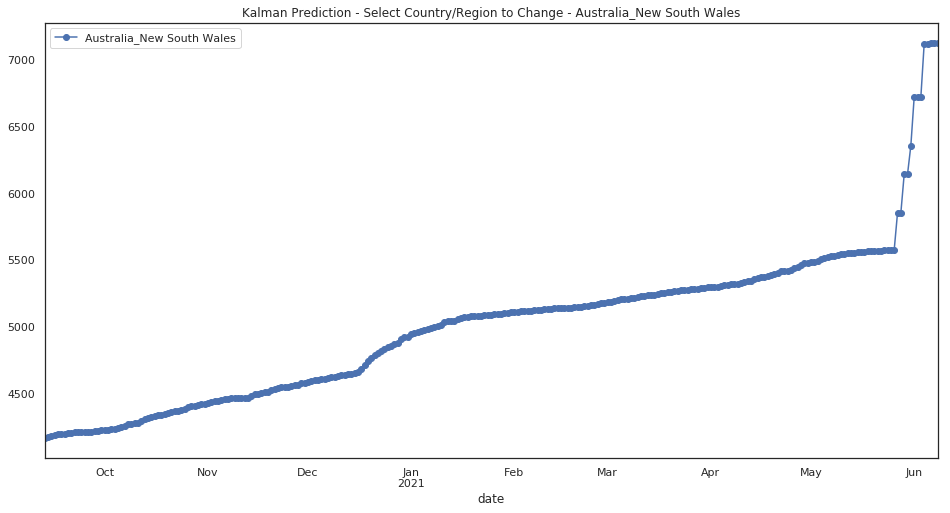

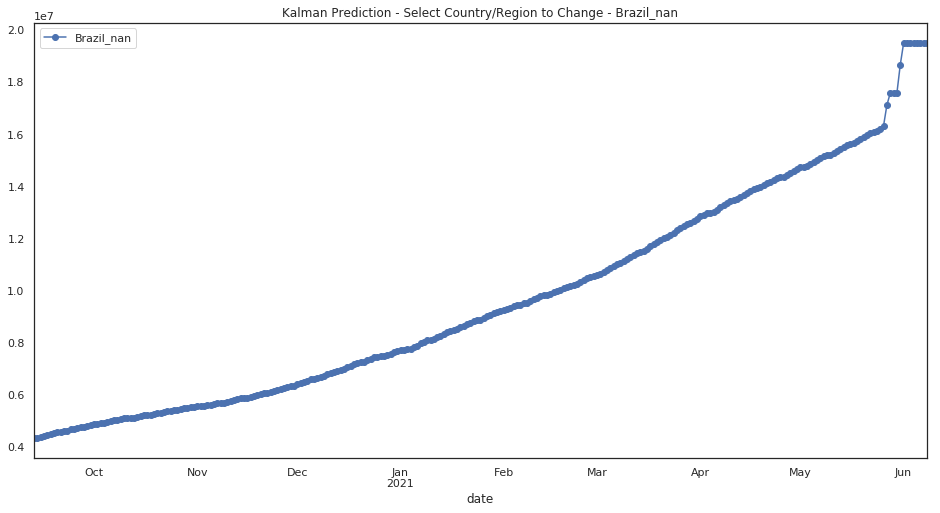

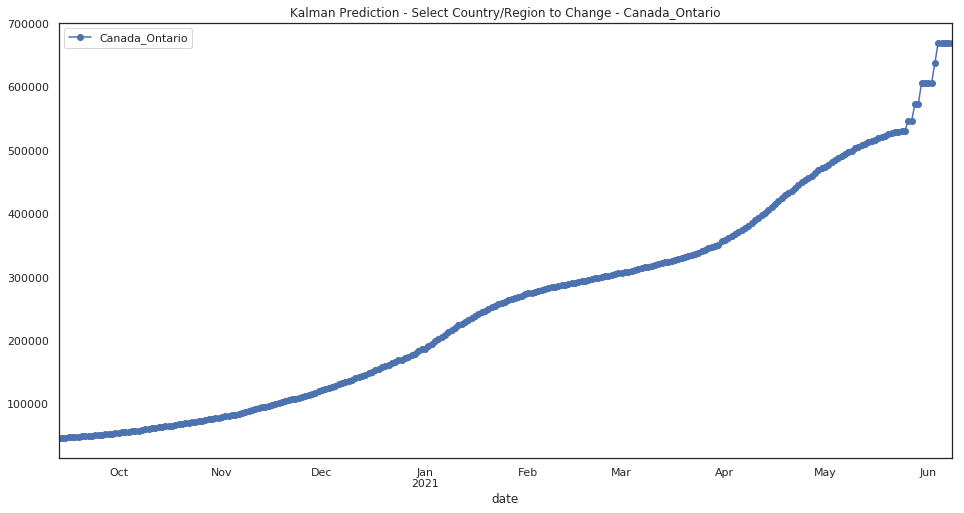

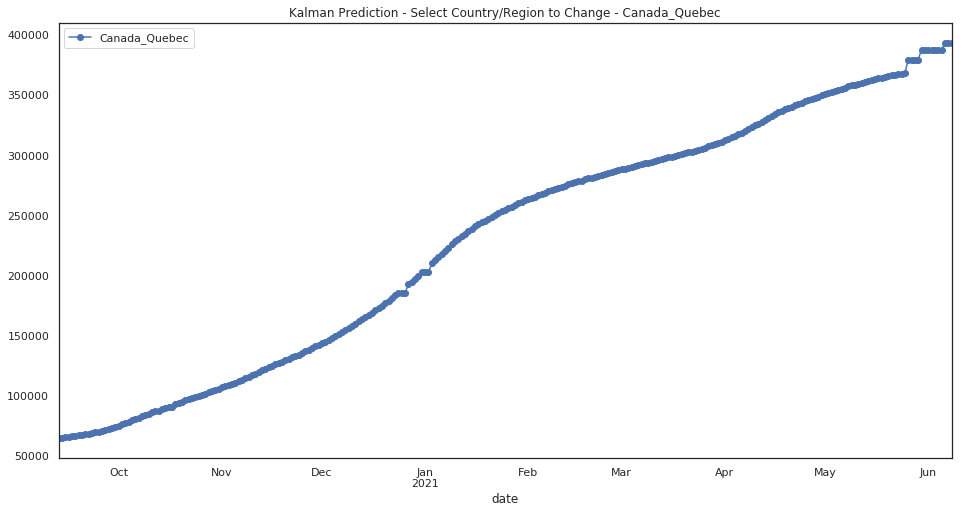

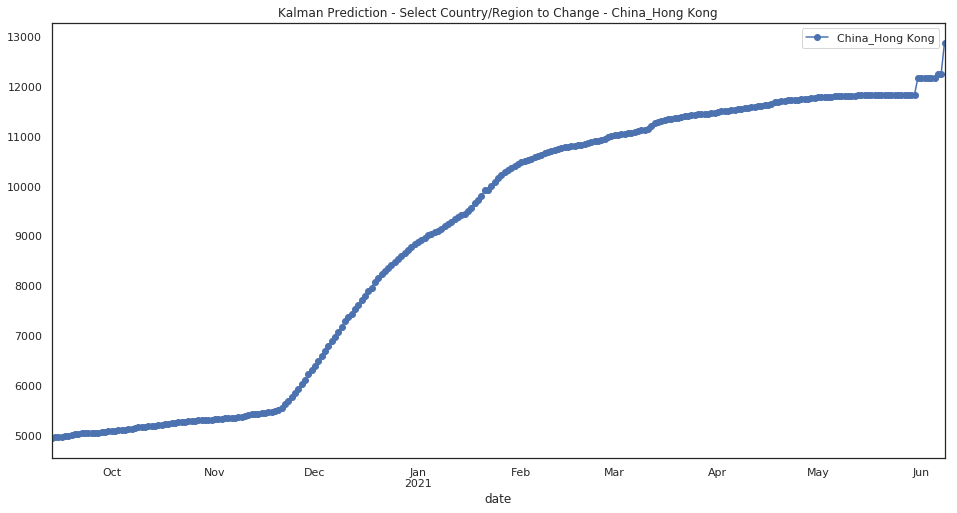

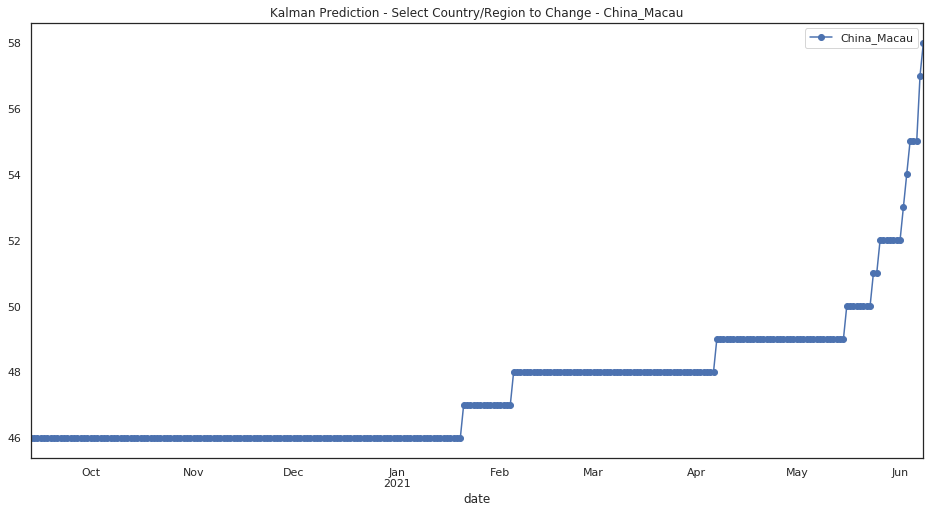

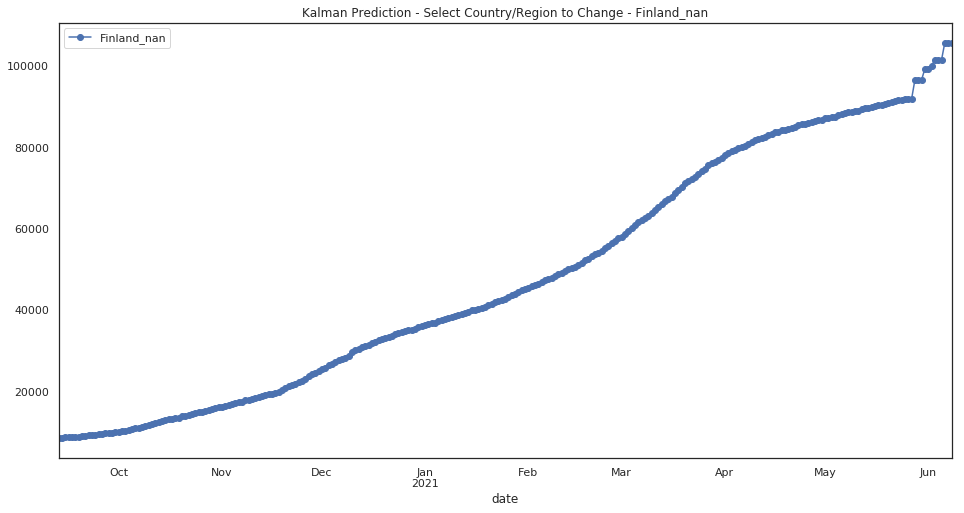

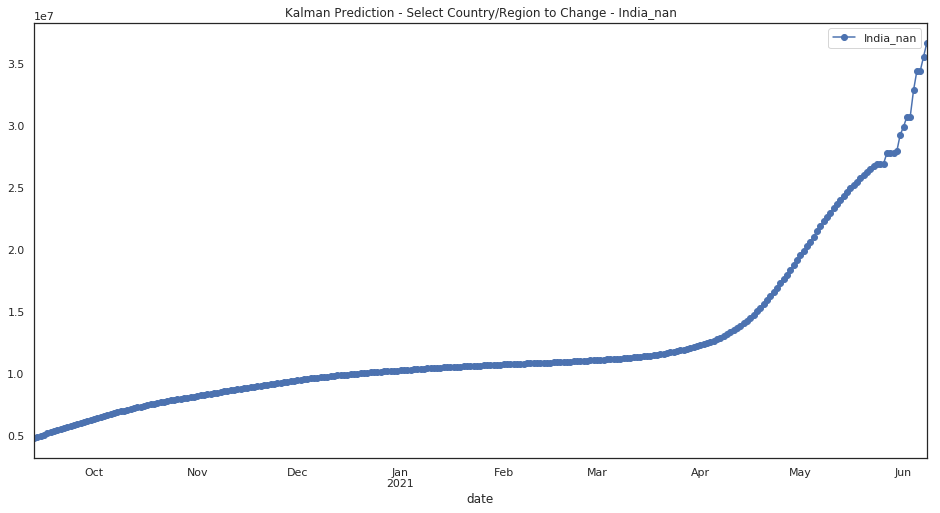

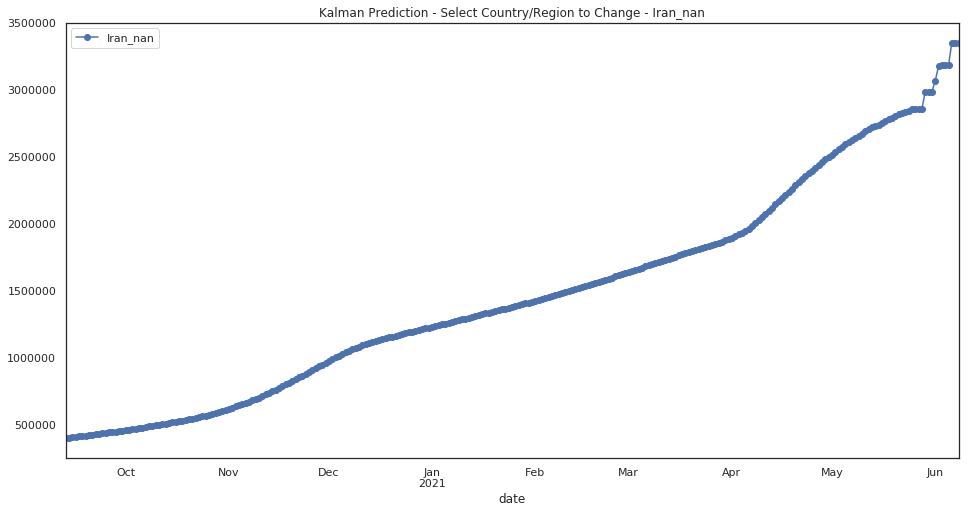

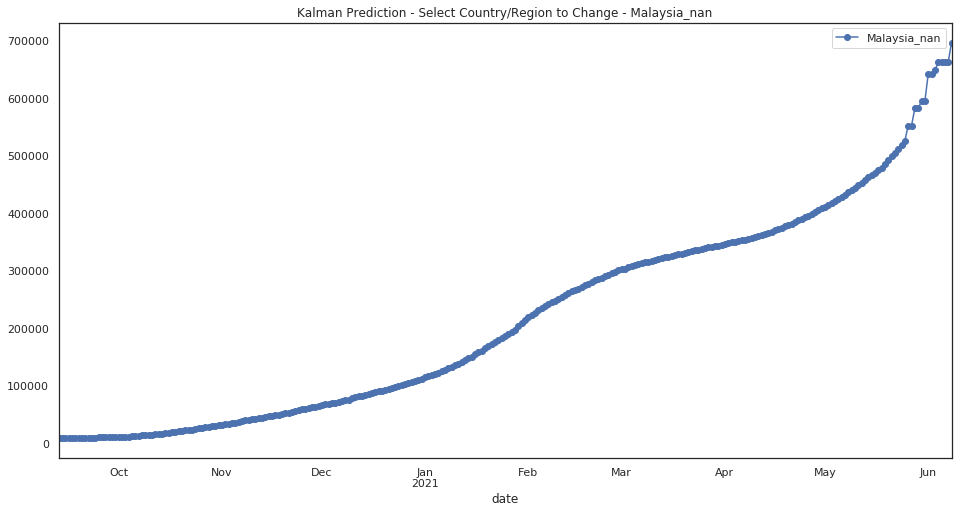

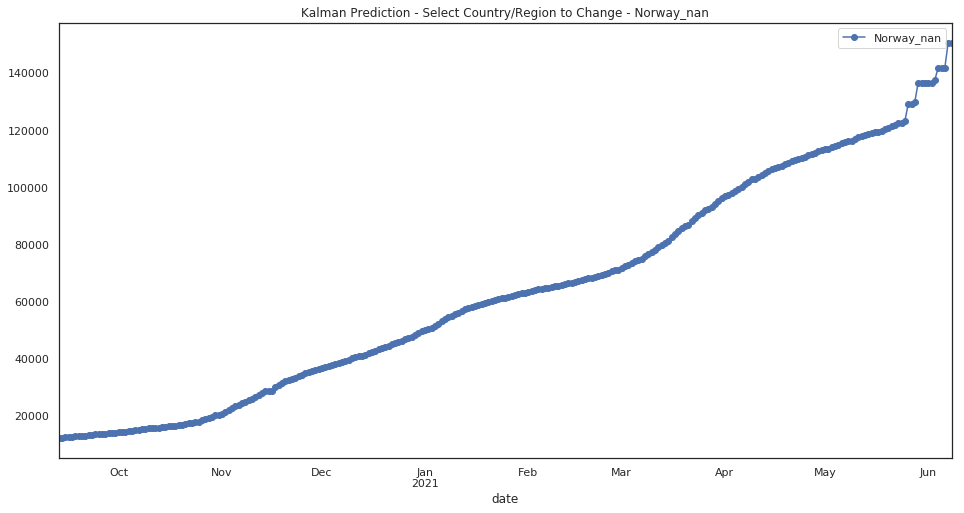

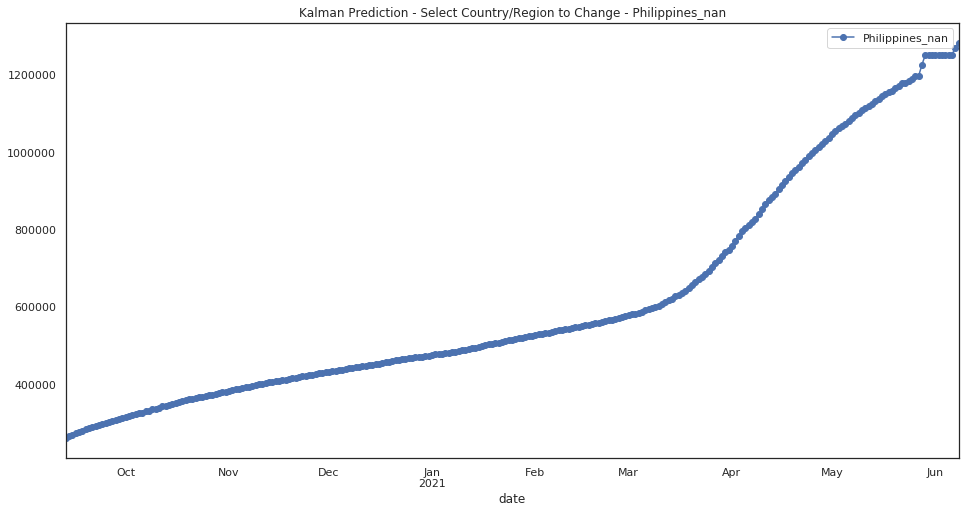

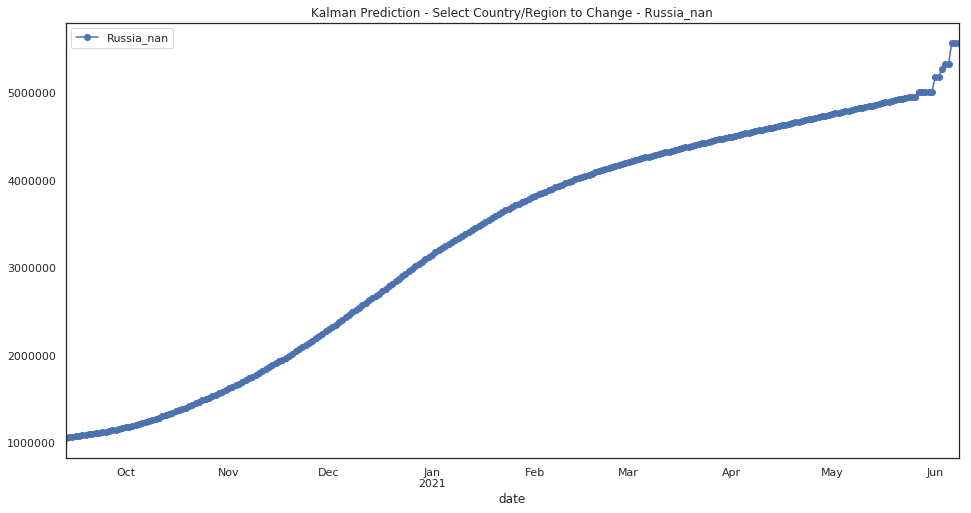

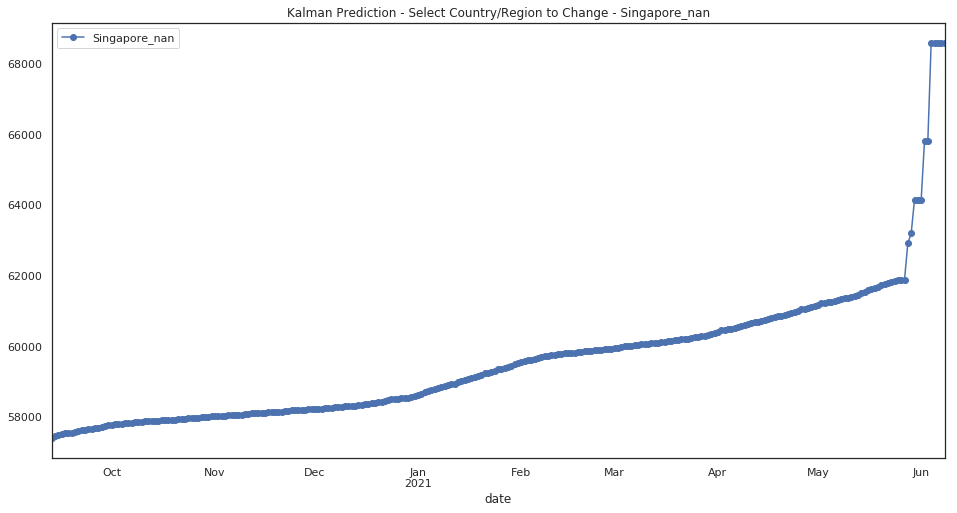

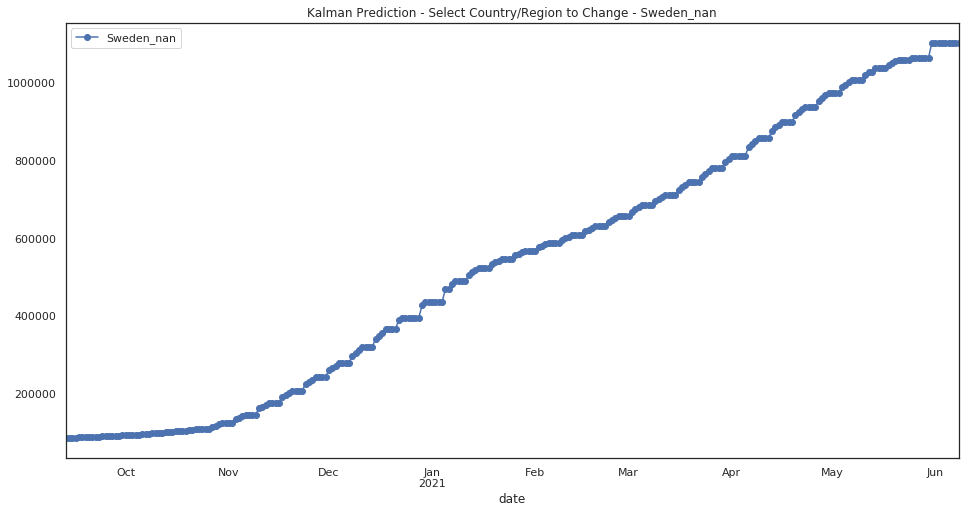

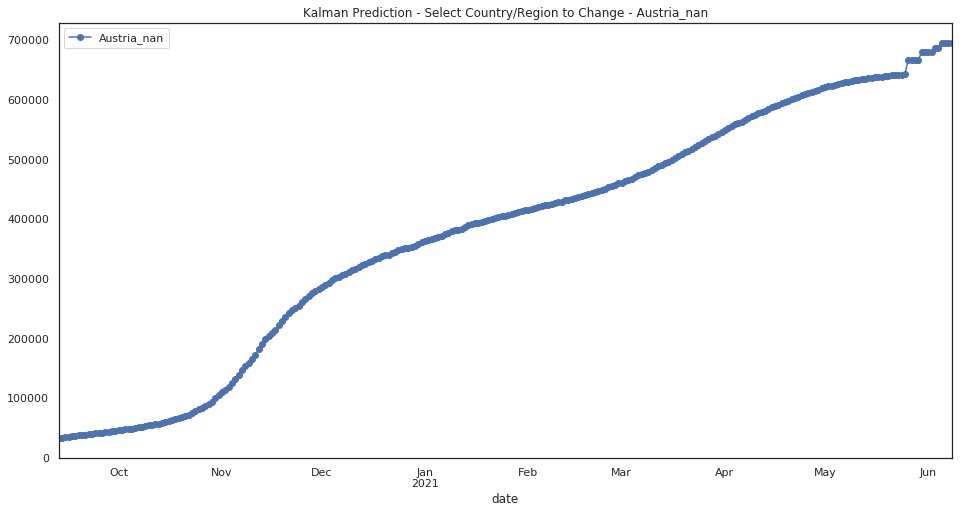

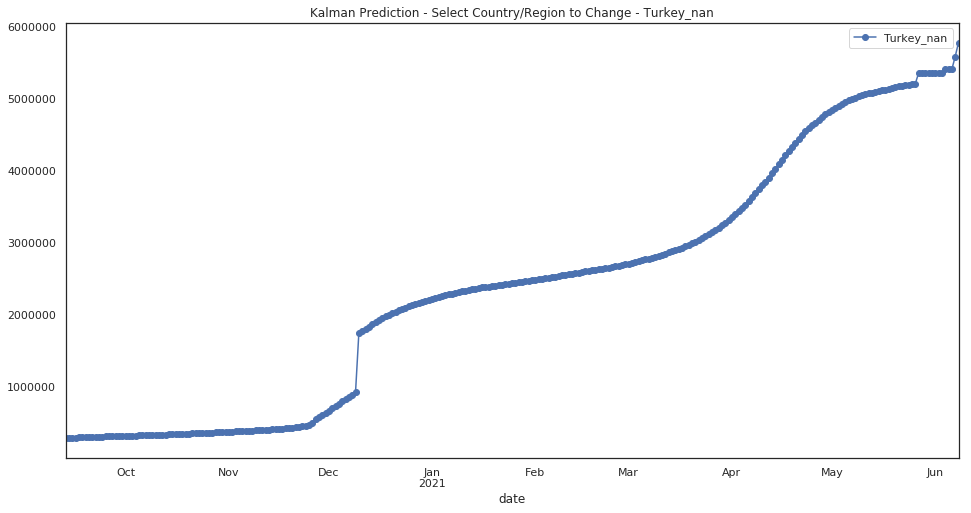

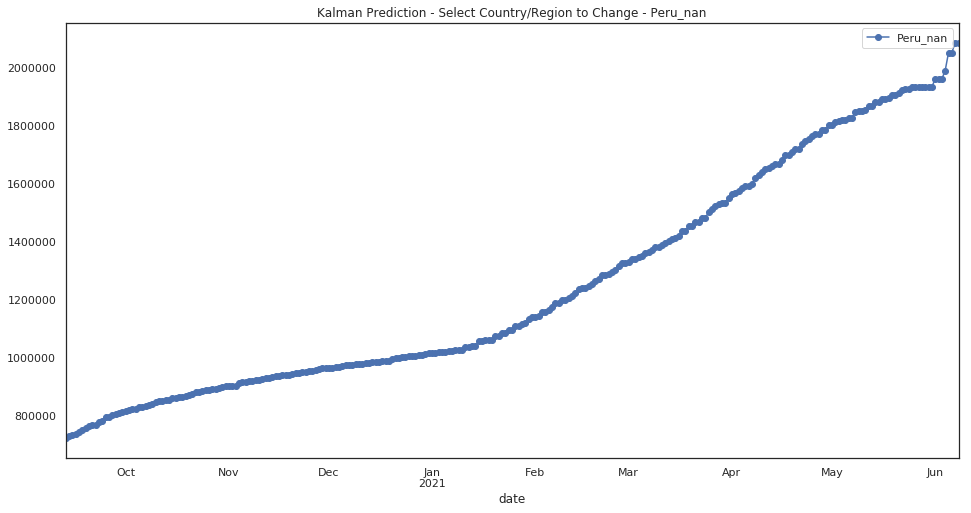

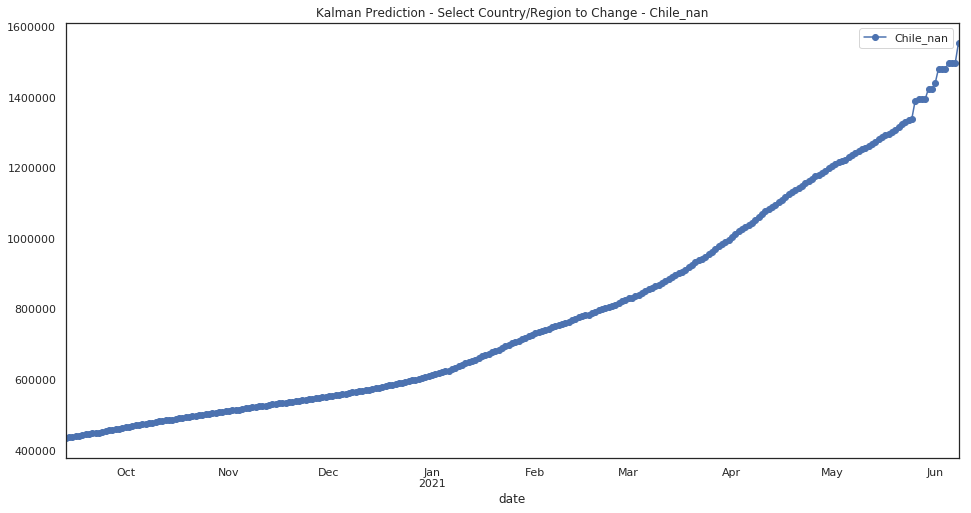

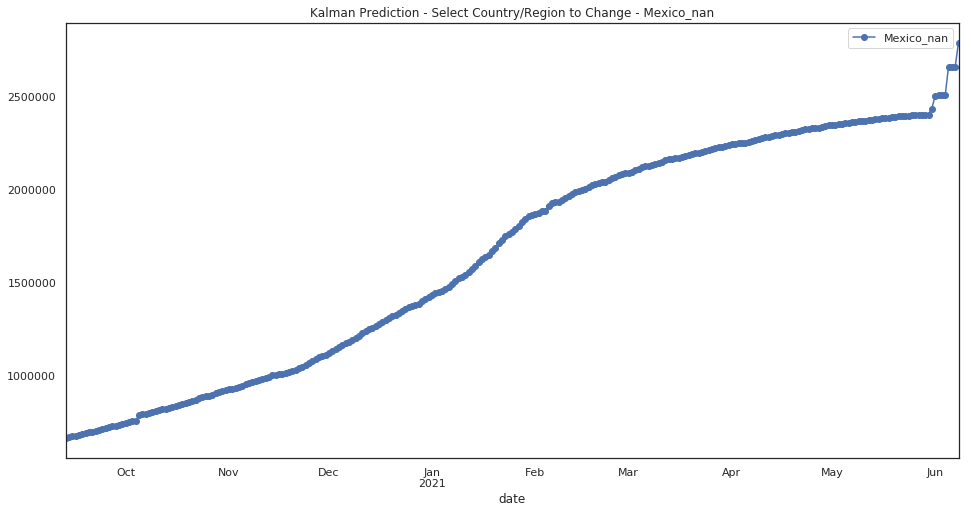

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-06-08 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      38593749.0
India_nan                                           NaN      36710648.0
Brazil_nan                                          NaN      19517184.0
France_nan                                          NaN       6230783.0
Turkey_nan                                          NaN       5779186.0
Russia_nan                                          NaN       5576551.0
United Kingdom_nan                                  NaN       5032532.0
Spain_nan                                           NaN       4847228.0
Italy_nan                                           NaN       4546772.0
Colombia_nan                                        NaN       3840215.0
Germany_nan                                         NaN       3685353.0
Argentina_nan                                       NaN       3651677.0
Iran_nan                                            NaN       3351647.0
Poland_nan                                          NaN       3159983.0
Mexico_nan                                          NaN       2788899.0
Ukraine_nan                                         NaN       2612069.0
Netherlands_nan                                     NaN       2217816.0
Indonesia_nan                                       NaN       2191961.0
Peru_nan                                            NaN       2084820.0
Czechia_nan                                         NaN       1939441.0
South Africa_nan                                    NaN       1709299.0
Chile_nan                                           NaN       1554548.0
Iraq_nan                                            NaN       1338700.0
Philippines_nan                                     NaN       1283157.0
Romania_nan                                         NaN       1204331.0
Sweden_nan                                          NaN       1103728.0
Belgium_nan                                         NaN       1053861.0
Pakistan_nan                                        NaN       1007655.0
Hungary_nan                                         NaN        991066.0
Bangladesh_nan                                      NaN        966152.0
...                                                 ...             ...
Dominica_nan                                        NaN           220.0
Australia_Northern Territory                        NaN           212.0
Grenada_nan                                         NaN           184.0
China_Guizhou                                       NaN           171.0
France_New Caledonia                                NaN           170.0
Canada_Northwest Territories                        NaN           152.0
Australia_Australian Capital Territory              NaN           148.0
United Kingdom_Anguilla                             NaN           122.0
Canada_Yukon                                        NaN            91.0
China_Ningxia                                       NaN            90.0
United Kingdom_Falkland Islands (Malvinas)          NaN            68.0
Saint Kitts and Nevis_nan                           NaN            66.0
China_Macau                                         NaN            58.0
Denmark_Greenland                                   NaN            42.0
Holy See_nan                                        NaN            40.0
France_Saint Pierre and Miquelon                    NaN            27.0
United Kingdom_Montserrat                           NaN            25.0
China_Qinghai                                       NaN            22.0
Solomon Islands_nan                                 NaN            20.0
Canada_Repatriated Travellers                       NaN            14.0
Canada_Grand Princess                               NaN            13.0
MS Zaandam_nan                                      NaN             9.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Vanuatu_nan                                         NaN             4.0
Marshall Islands_nan  

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          50300.0      26700.0      58526.0      18068.0   
2020-09-14          50348.0      26844.0      58734.0      18149.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      48966.0       1483.0   
2020-09-18          38872.0      11948.0      49194.0       1483.0   
2020-09-19          38897.0      12073.0      49413.0       1564.0   
2020-09-20          38919.0      12226.0      49623.0       1564.0   
2020-09-21          39215.0      12537.0      50109.0       1939.0   
2020-09-22          39234.0      12687.0      50302.0       1681.0   
2020-09-23          39280.0      12825.0      50489.0       2049.0   
2020-09-24          39302.0      12962.0      50670.0       1753.0   
2020-09-25          39316.0      13073.0      50847.0       2082.0   
2020-09-26          39323.0      13192.0      51010.0       1836.0   
2020-09-27          39350.0      13313.0      51163.0       2096.0   
2020-09-28          39375.0      13441.0      51310.0       2208.0   
2020-09-29          39389.0      13549.0      51464.0       1966.0   
2020-09-30          39405.0      13689.0      51629.0       2332.0   
2020-10-01          39422.0      13844.0      51794.0       2050.0   
2020-10-02          39430.0      13985.0      51954.0       2348.0   
2020-10-03          39435.0      14142.0      52104.0       2110.0   
2020-10-04          39474.0      14300.0      52244.0       2326.0   
2020-10-05          39555.0      14444.0      52377.0       2551.0   
2020-10-06          39627.0      14602.0      52504.0       2370.0   
2020-10-07          39689.0      14753.0      52625.0       2924.0   
2020-10-08          39755.0      14920.0      52761.0       2568.0   
2020-10-09          39826.0      15087.0      52911.0       3006.0   
2020-10-10          39841.0      15256.0      53053.0       2696.0   
2020-10-11          39914.0      15427.0      53186.0       2971.0   
2020-10-12          39995.0      15595.0      53422.0       3229.0   
...                     ...          ...          ...          ...   
2021-05-11          62463.0     131869.0     124571.0      13429.0   
2021-05-12          62809.0     131918.0     124780.0      13447.0   
2021-05-13          63141.0     131962.0     124994.0      13470.0   
2021-05-14          63470.0     132017.0     125173.0      13494.0   
2021-05-15          63553.0     132060.0     125300.0      13510.0   
2021-05-16          63554.0     132097.0     125407.0      13510.0   
2021-05-17          63645.0     132117.0     125566.0      13538.0   
2021-05-18          63854.0     132144.0     125794.0      13555.0   
2021-05-19          64198.0     132180.0     126016.0      13569.0   
2021-05-20          64673.0     132197.0     126272.0      13569.0   
2021-05-21          65230.0     132232.0     126573.0      13569.0   
2021-05-22          65673.0     132263.0     126802.0      13569.0   
2021-05-23          65893.0     132291.0     126981.0      13569.0   
2021-05-24          66321.0     132306.0     127208.0      13569.0   
2021-05-25          66990.0     132306.0     127468.0      13637.0   
2021-05-26          67086.0     132313.0     127505.0      13872.0   
2021-05-27          66916.0     137929.0     127402.0      14000.0   
2021-05-28          66957.0     141470.0     127406.0      14106.0   
2021-05-29          70229.0     139116.0     127410.0      14511.0   
2021-05-30          71939.0     139348.0     131699.0      14802.0   
2021-05-31          73449.0     145232.0     134383.0      15218.0   
2021-06-01          74707.0     152324.0     132369.0      15284.0   
2021-06-02          73751.0     150965.0     132390.0      15218.0   
2021-06-03          76797.0     154153.0     132313.0      15763.0   
2021-06-04

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'France_nan',
 'Turkey_nan',
 'Russia_nan',
 'United Kingdom_nan',
 'Spain_nan',
 'Italy_nan',
 'Colombia_nan',
 'Germany_nan',
 'Argentina_nan',
 'Iran_nan',
 'Poland_nan',
 'Mexico_nan',
 'Ukraine_nan',
 'Netherlands_nan',
 'Indonesia_nan',
 'Peru_nan',
 'Czechia_nan',
 'South Africa_nan',
 'Chile_nan',
 'Iraq_nan',
 'Philippines_nan',
 'Romania_nan',
 'Sweden_nan',
 'Belgium_nan',
 'Pakistan_nan',
 'Hungary_nan',
 'Bangladesh_nan',
 'Israel_nan',
 'Portugal_nan',
 'Switzerland_nan',
 'Jordan_nan',
 'Japan_nan',
 'Serbia_nan',
 'Malaysia_nan',
 'Austria_nan',
 'Canada_Ontario',
 'Nepal_nan',
 'Lebanon_nan',
 'Morocco_nan',
 'United Arab Emirates_nan',
 'Kazakhstan_nan',
 'Saudi Arabia_nan',
 'Bulgaria_nan',
 'Panama_nan',
 'Paraguay_nan',
 'Ecuador_nan',
 'West Bank and Gaza_nan',
 'Belarus_nan',
 'Greece_nan',
 'Croatia_nan',
 'Tunisia_nan',
 'Slovakia_nan',
 'Bolivia_nan',
 'Georgia_nan',
 'Canada_Quebec',
 'Dominican Republic_nan

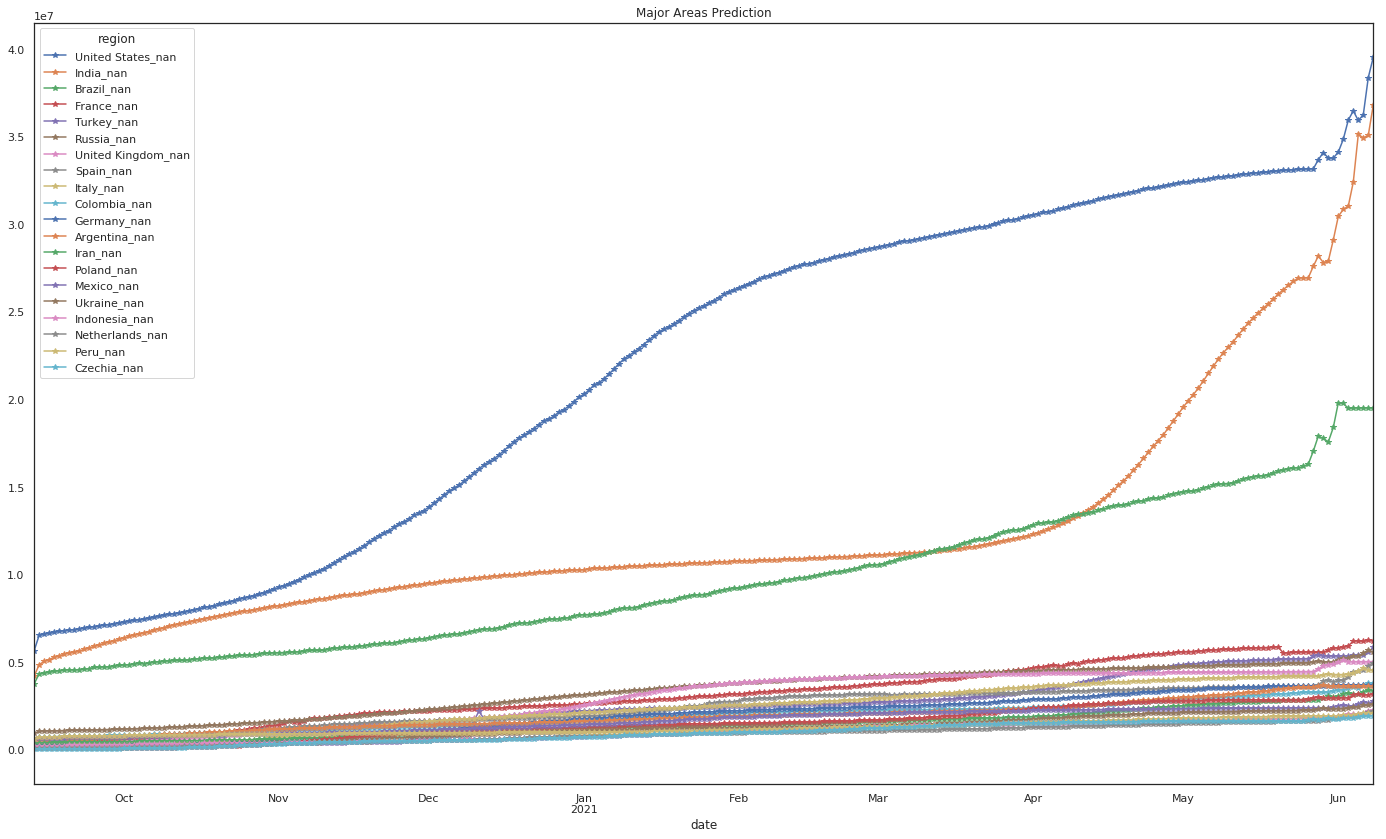

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

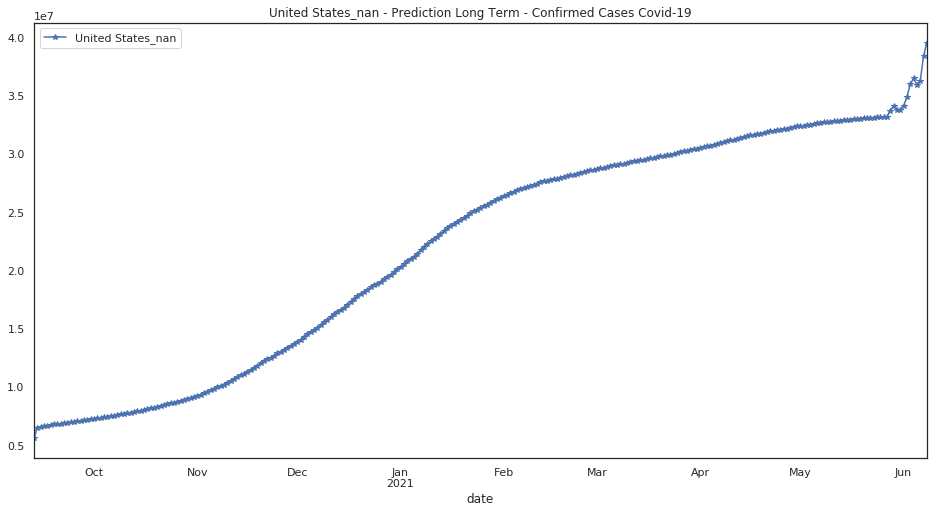

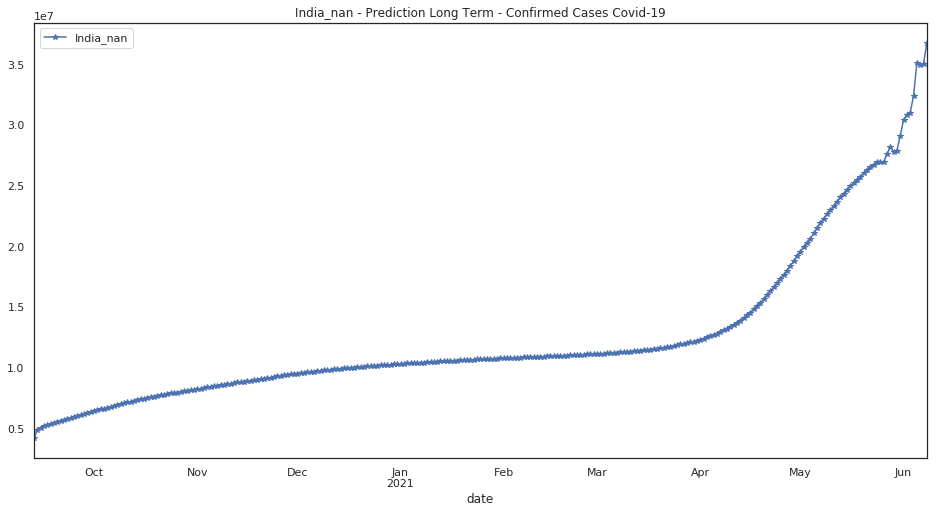

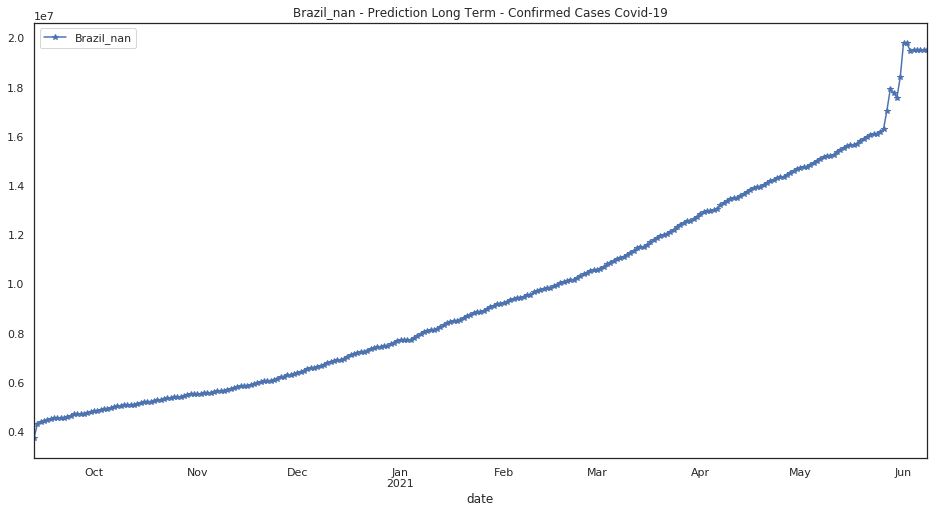

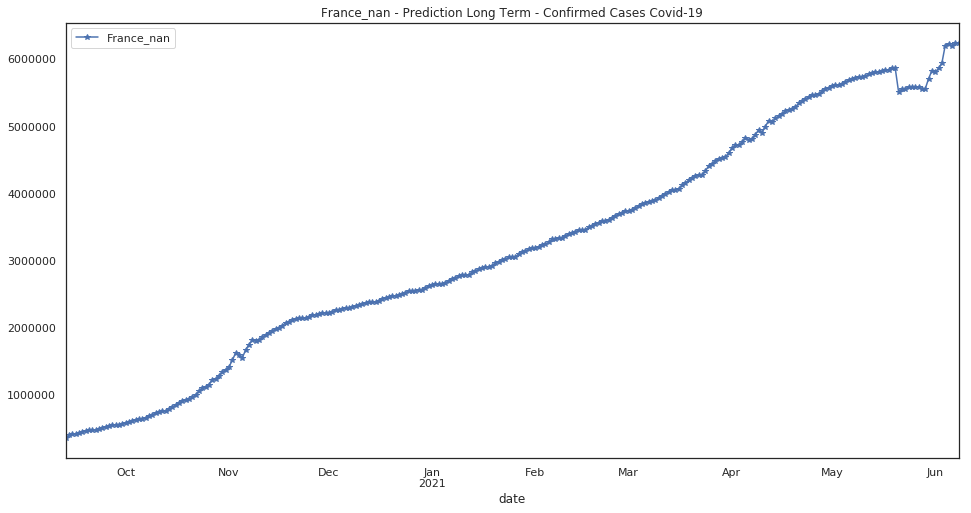

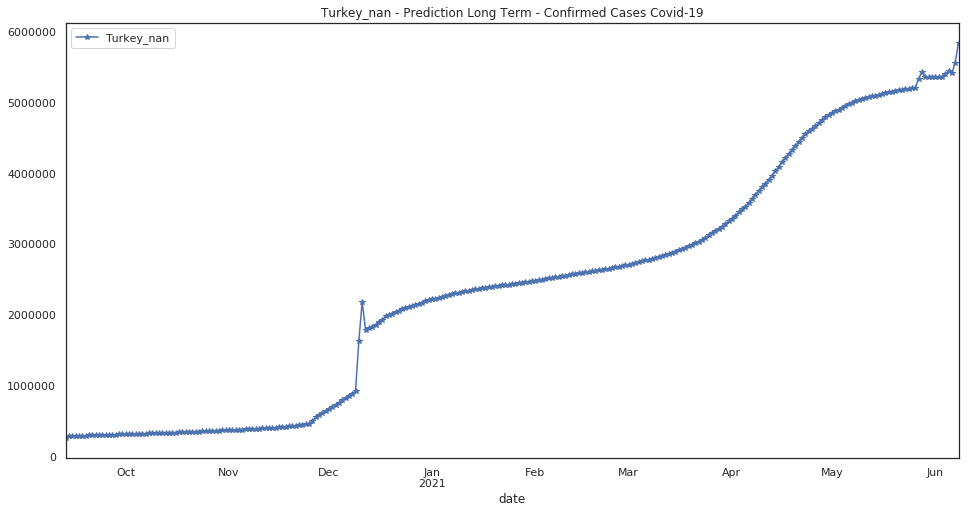

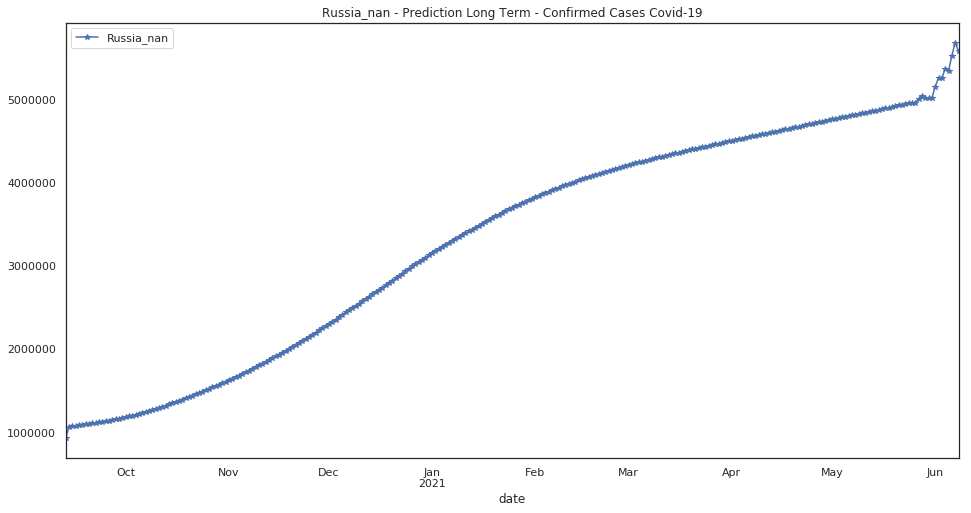

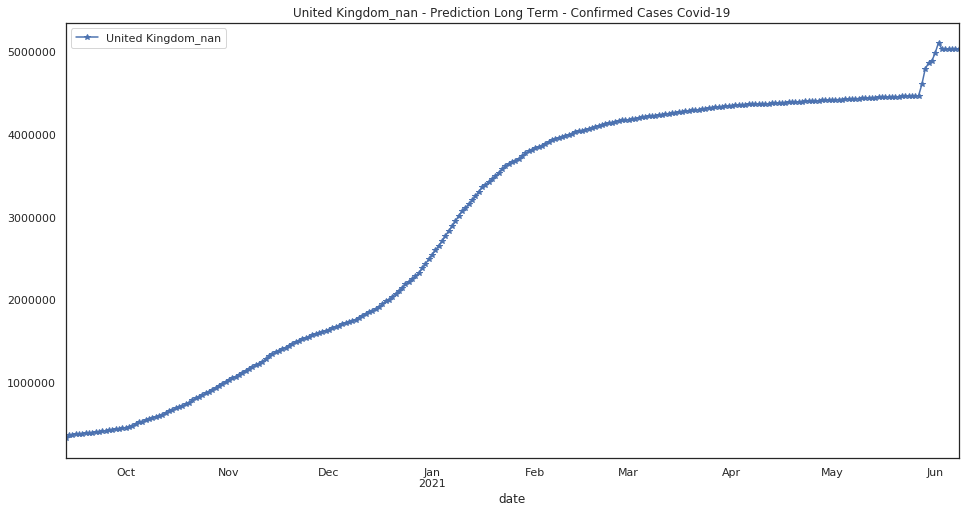

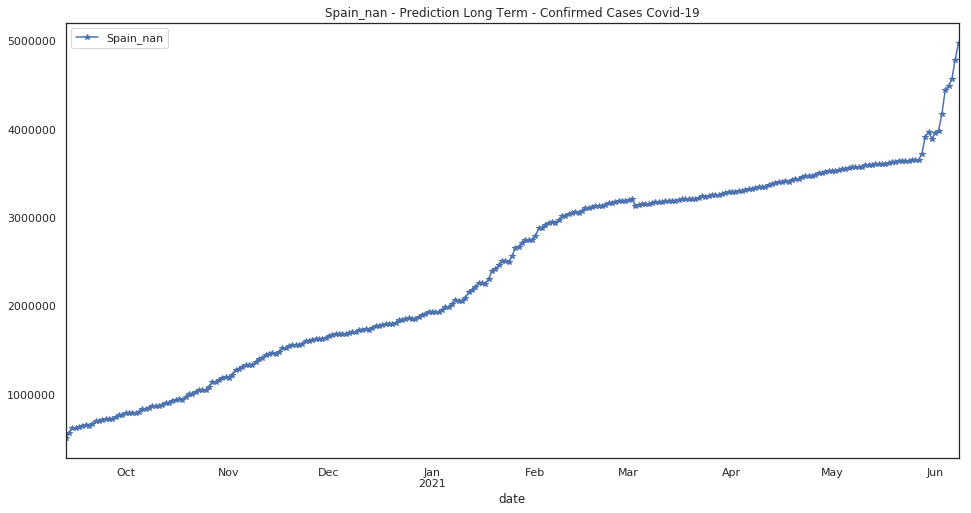

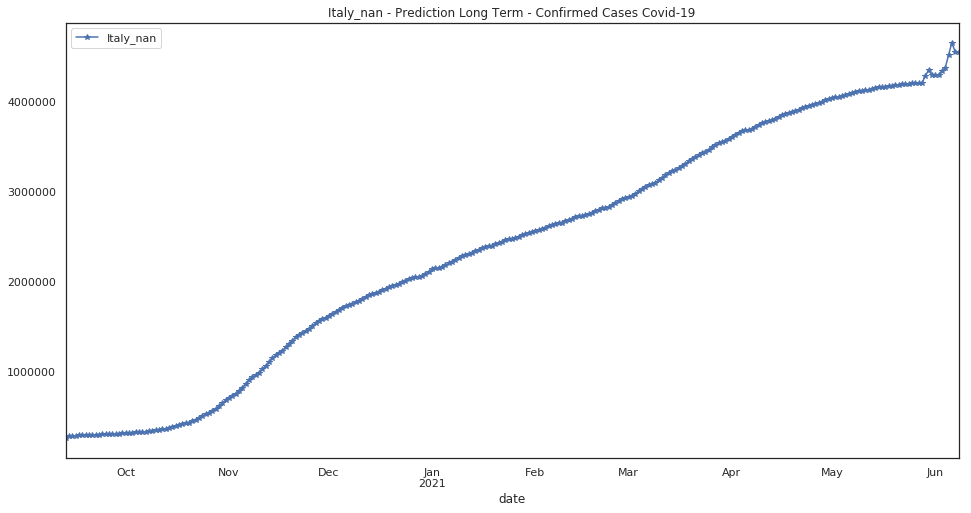

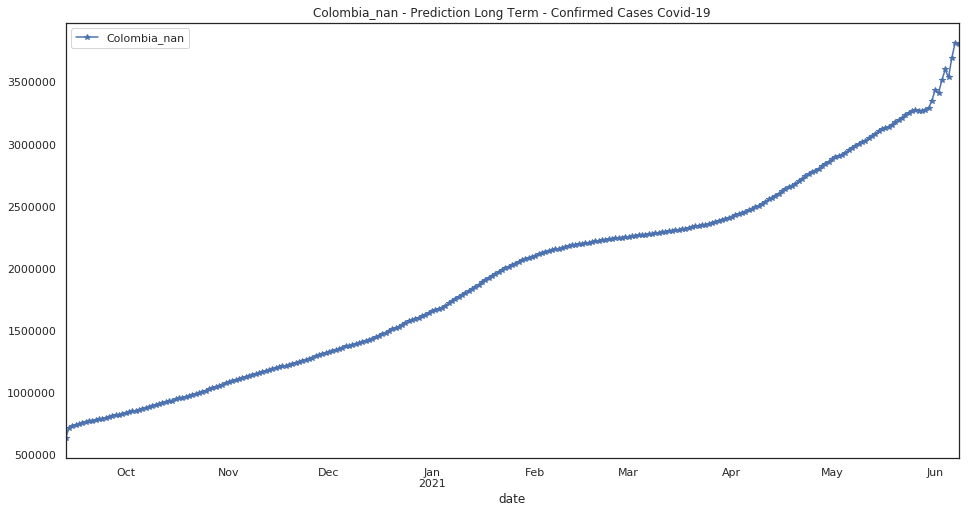

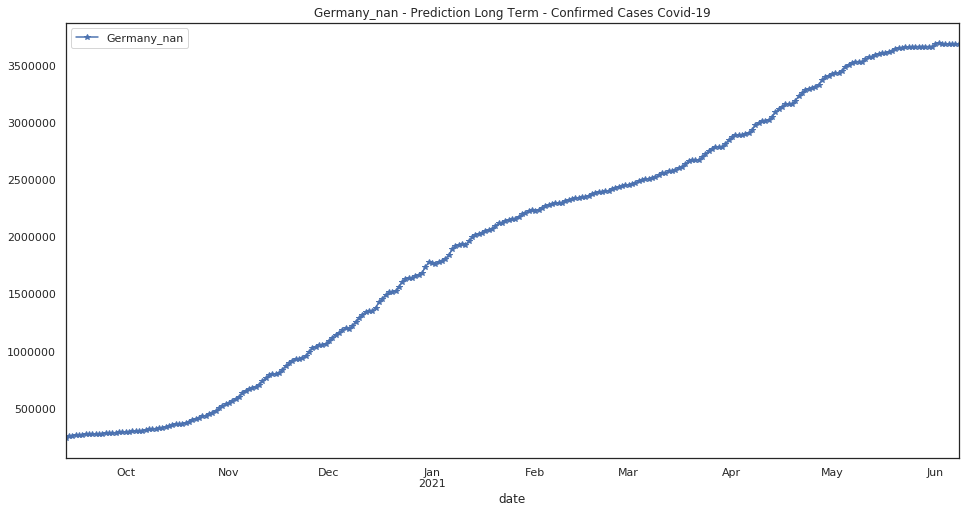

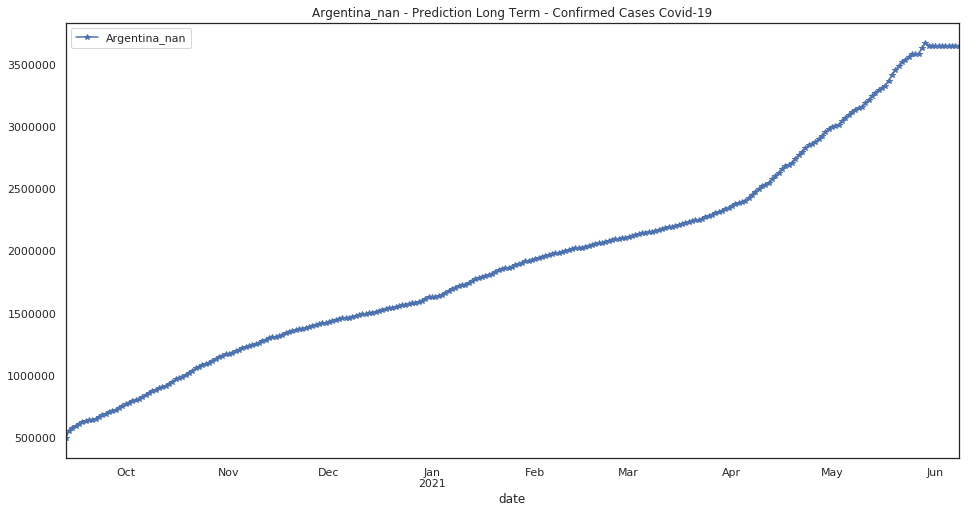

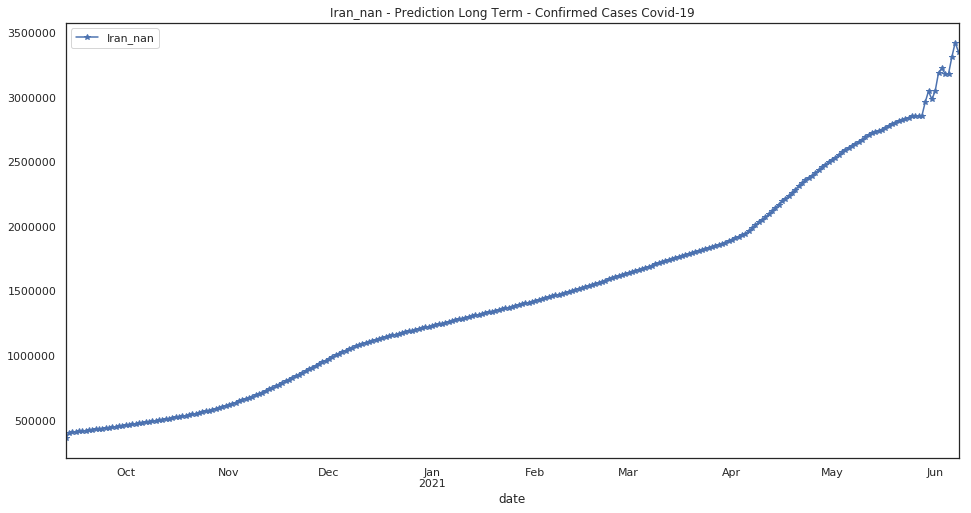

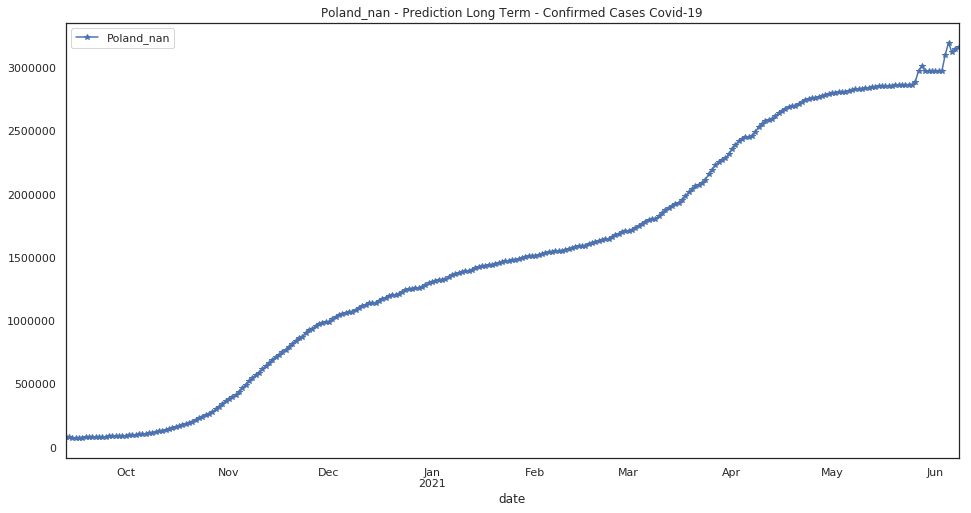

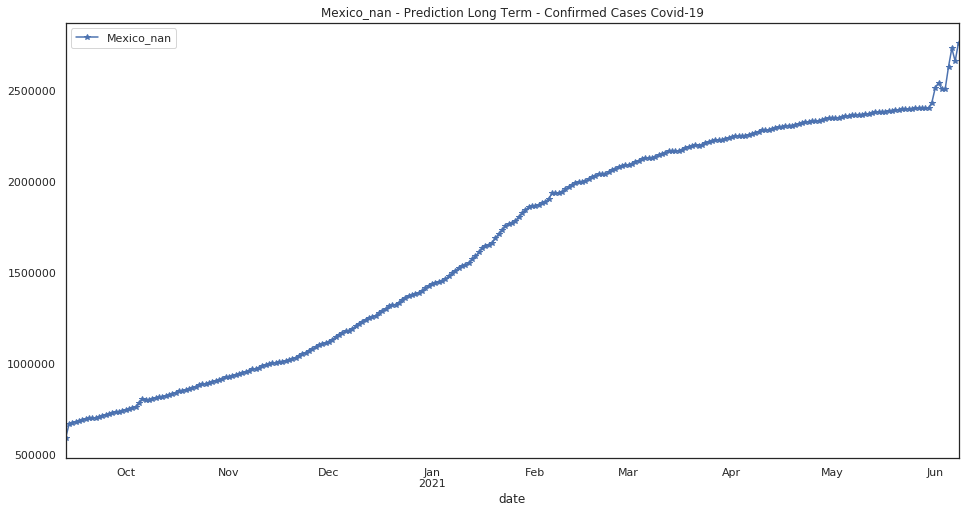

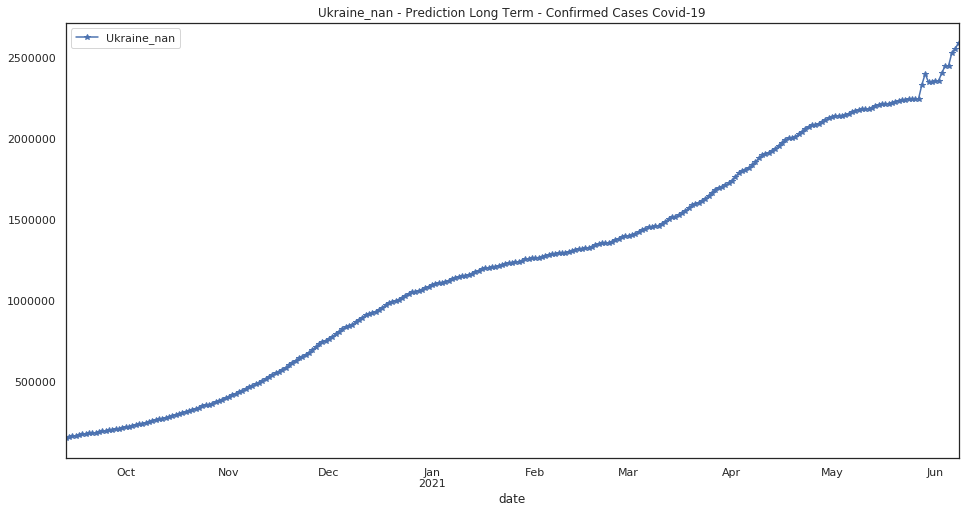

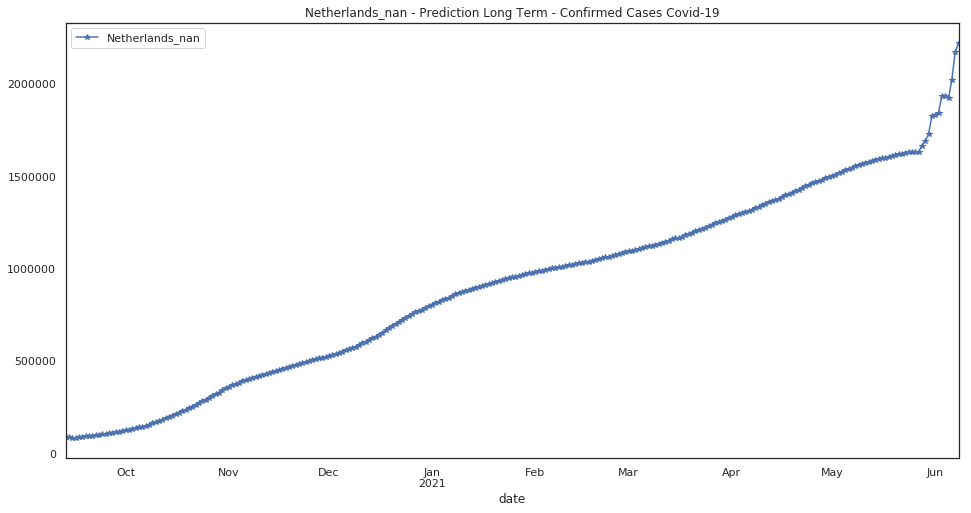

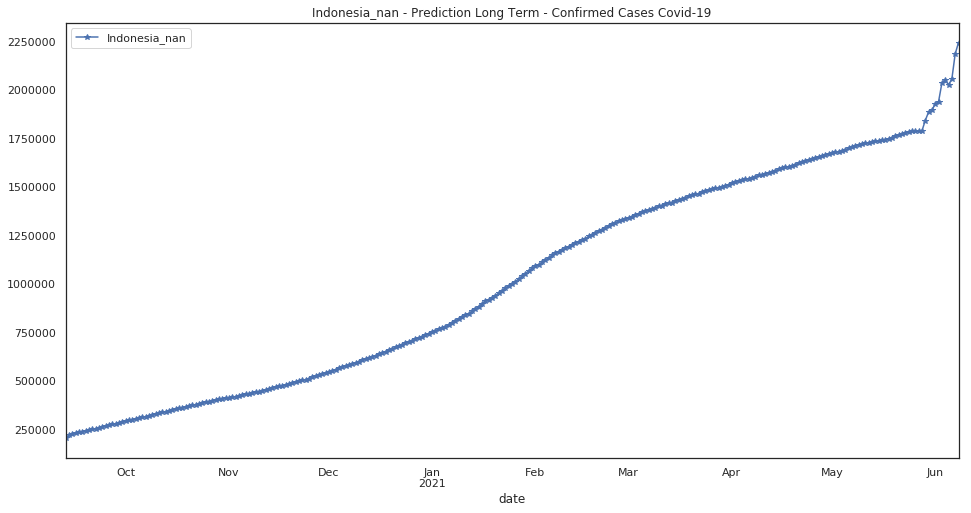

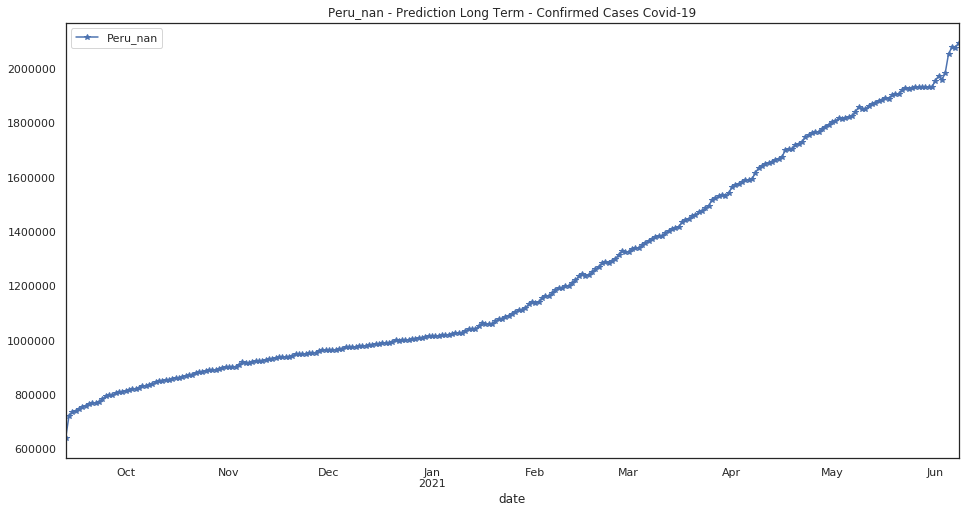

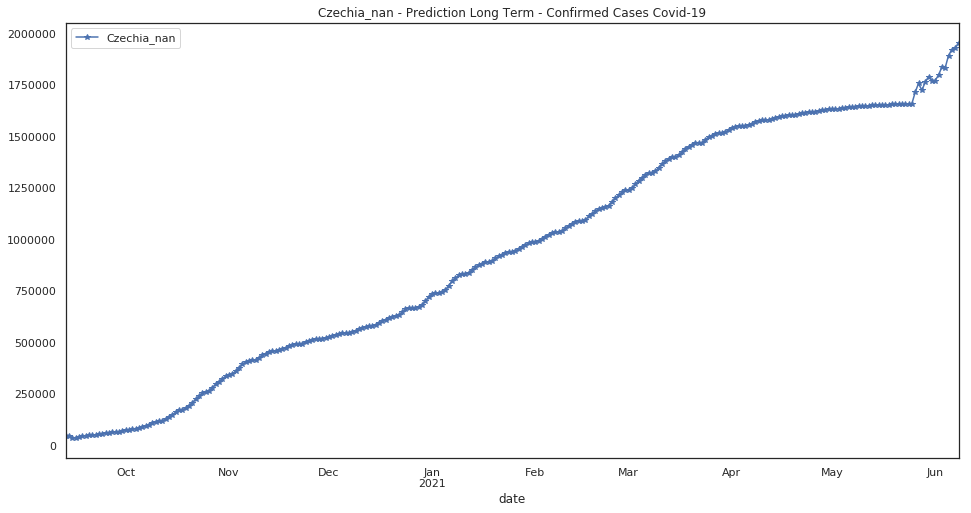

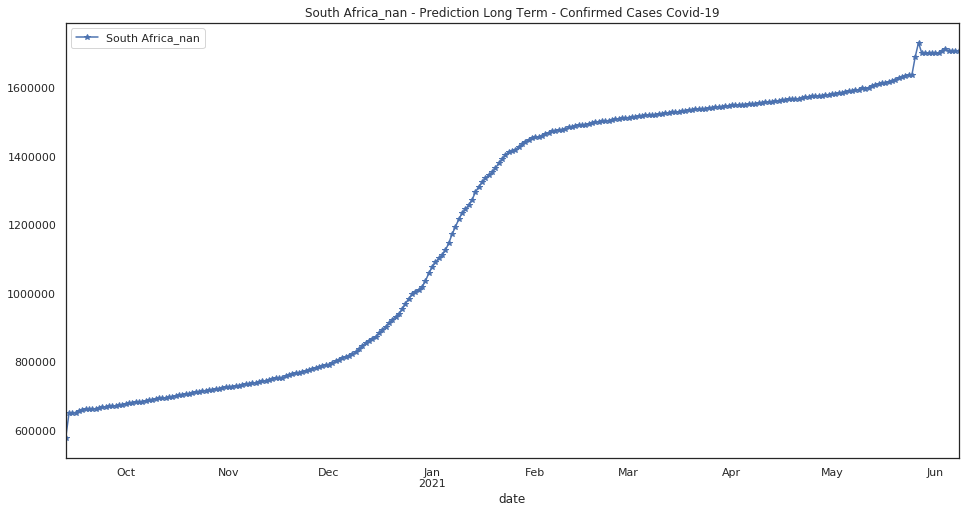

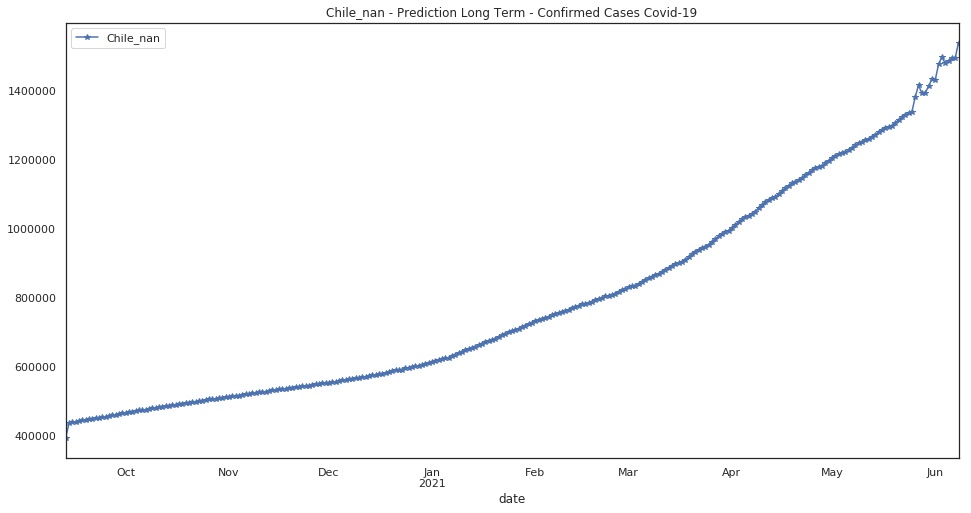

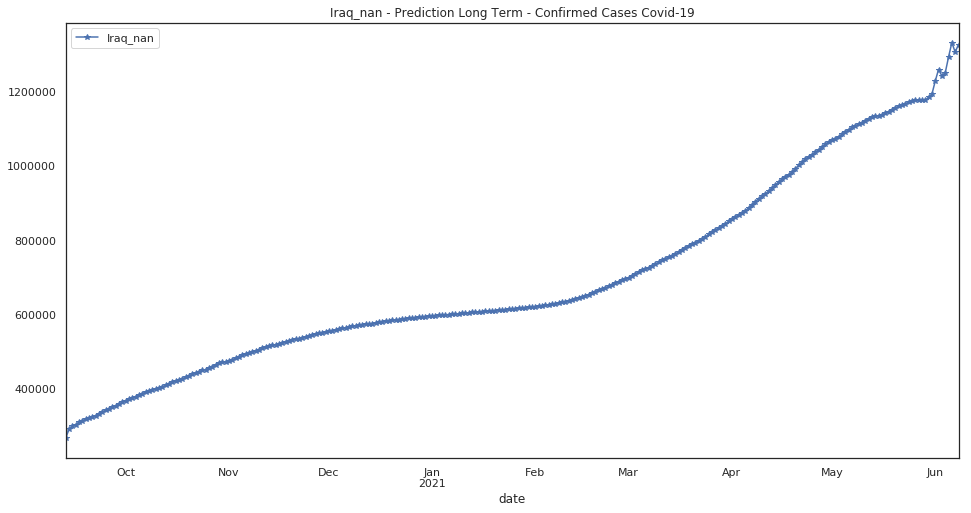

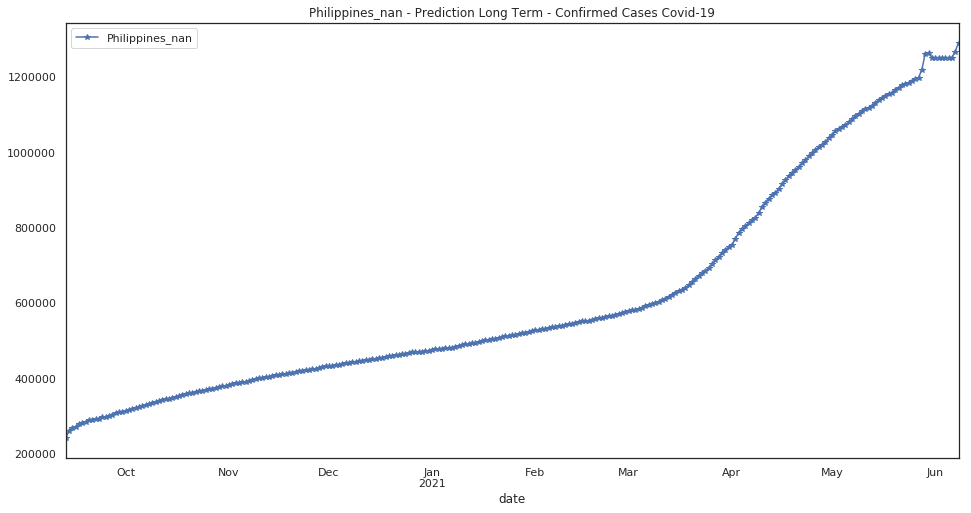

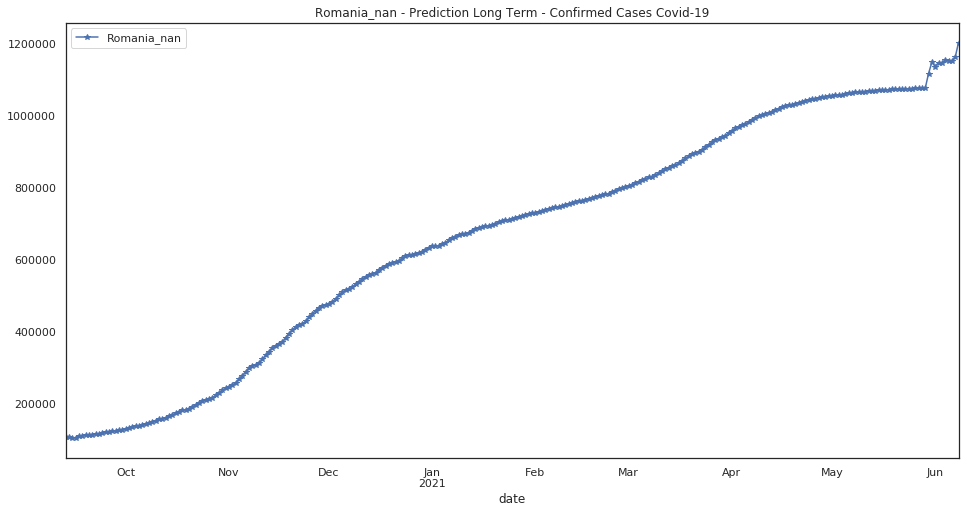

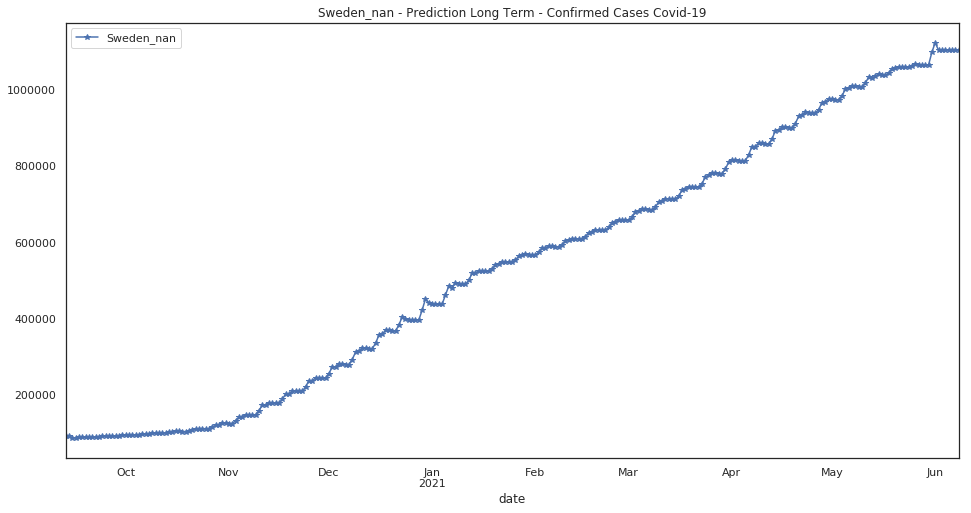

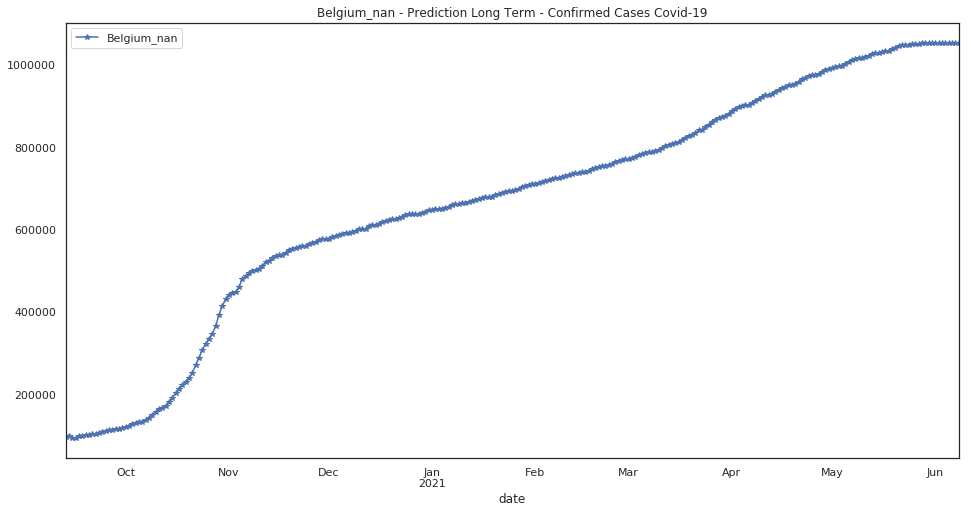

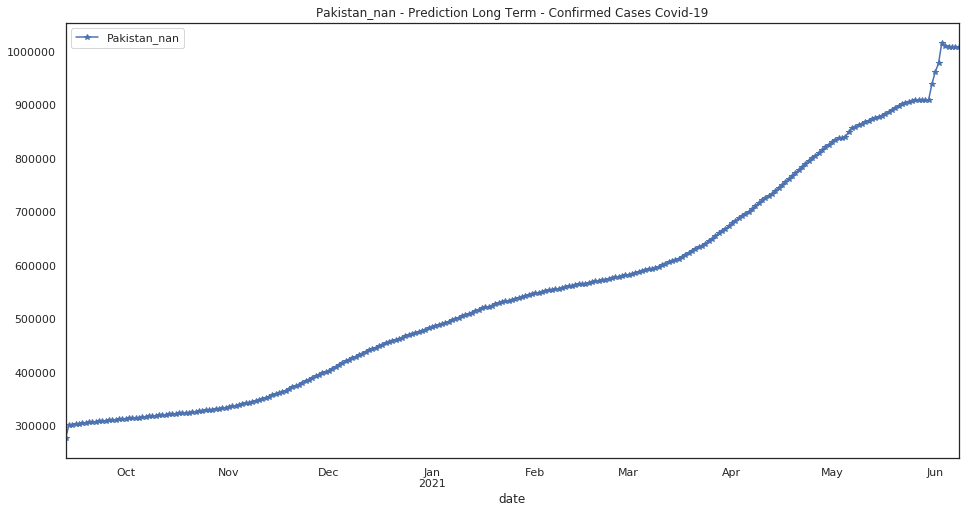

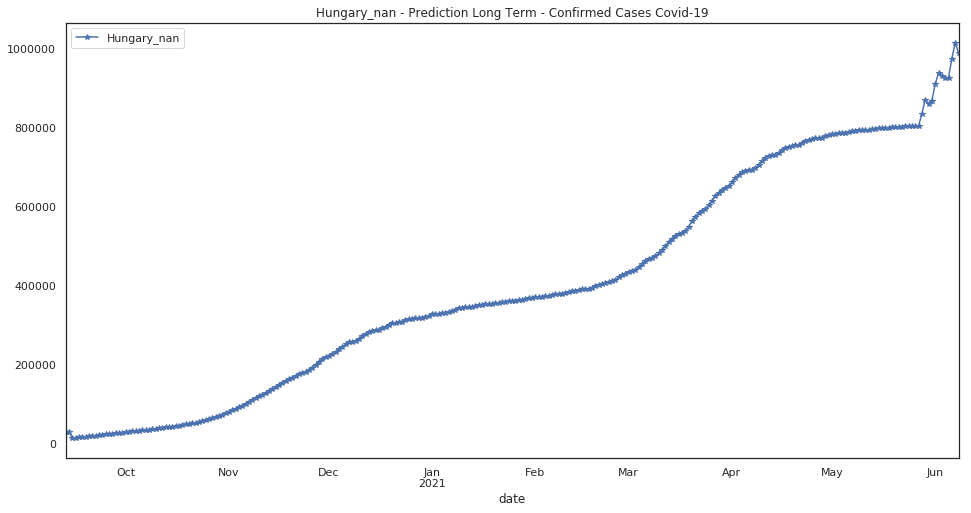

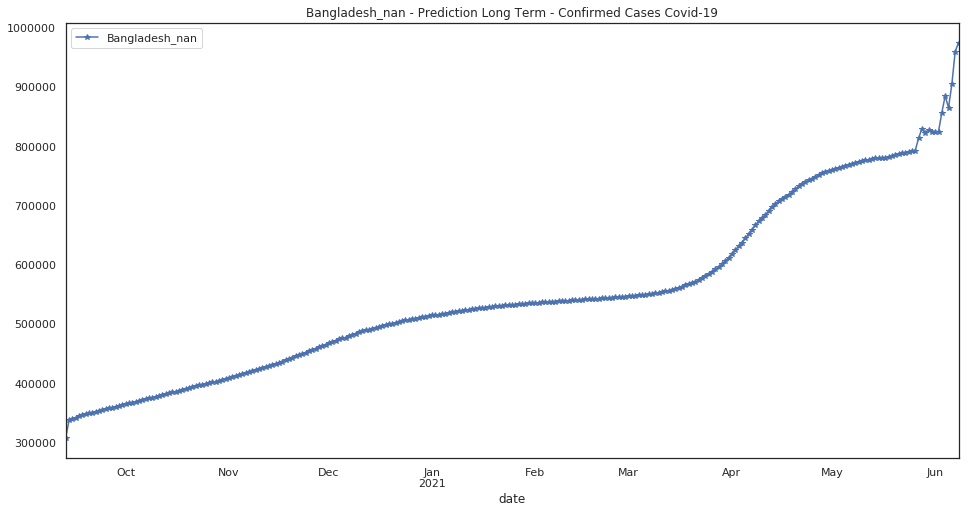

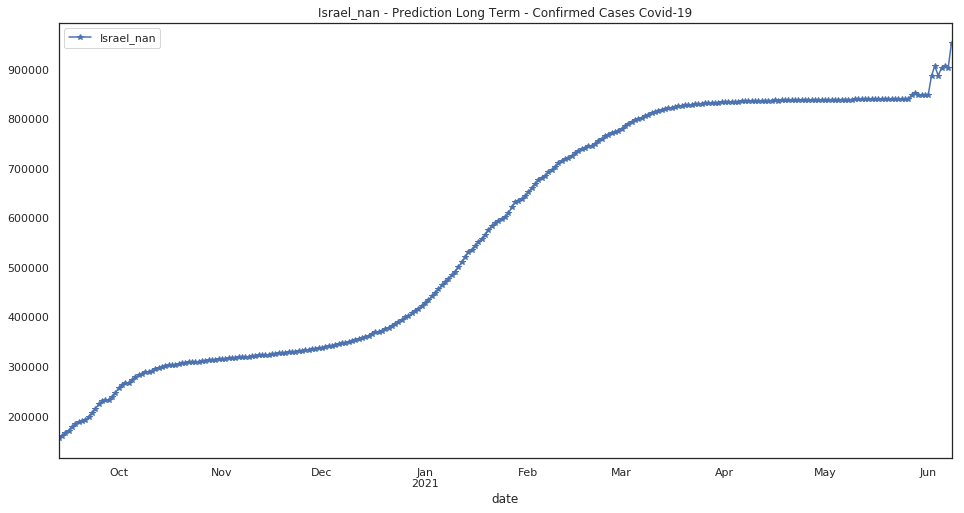

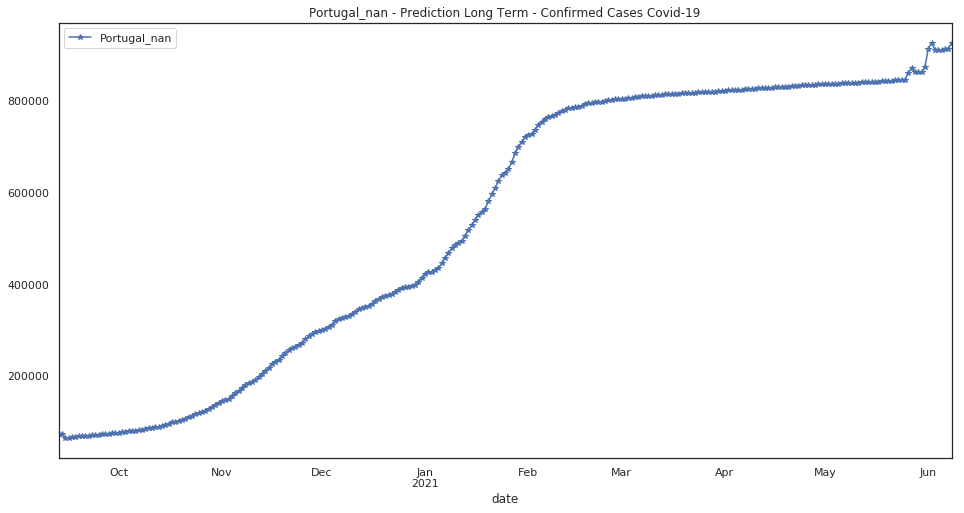

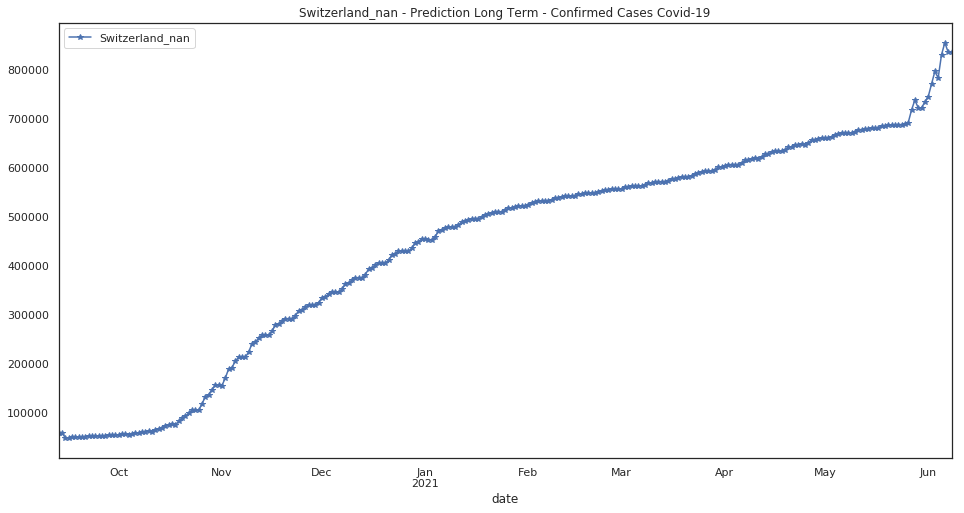

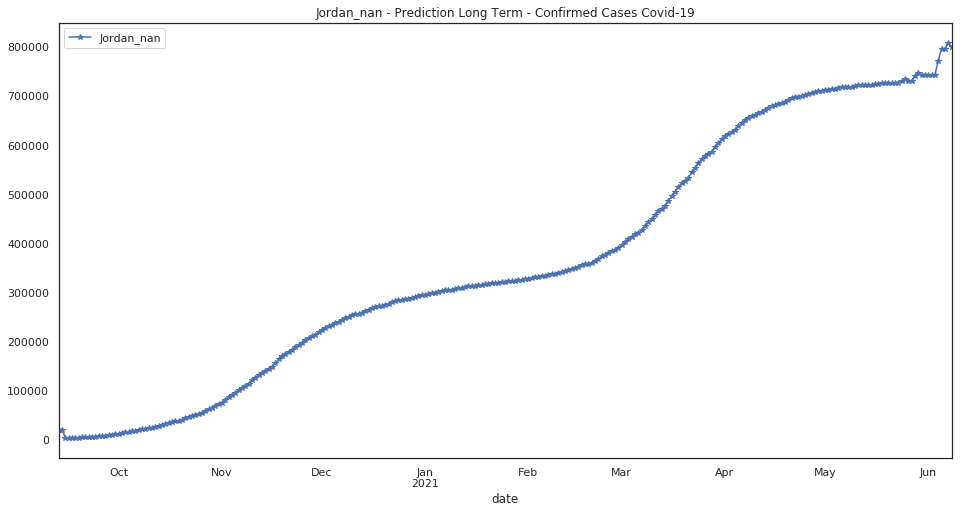

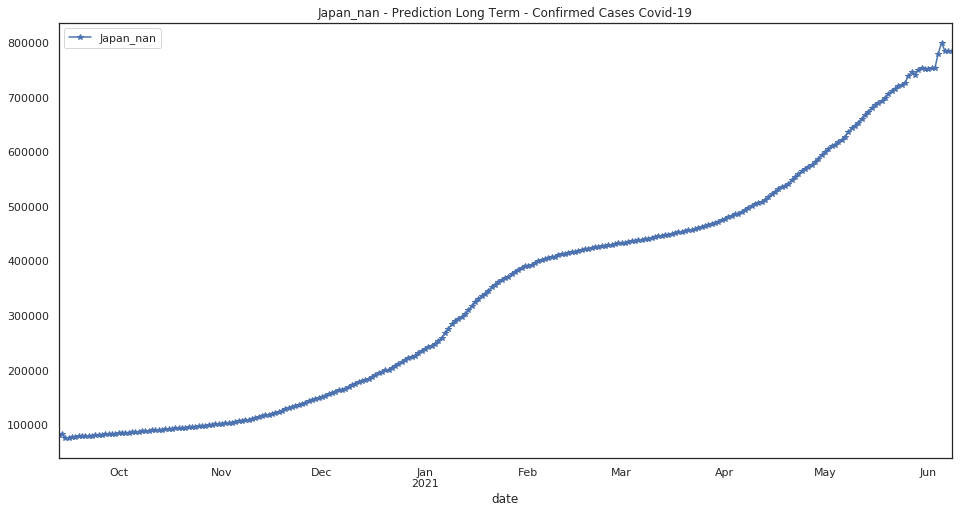

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

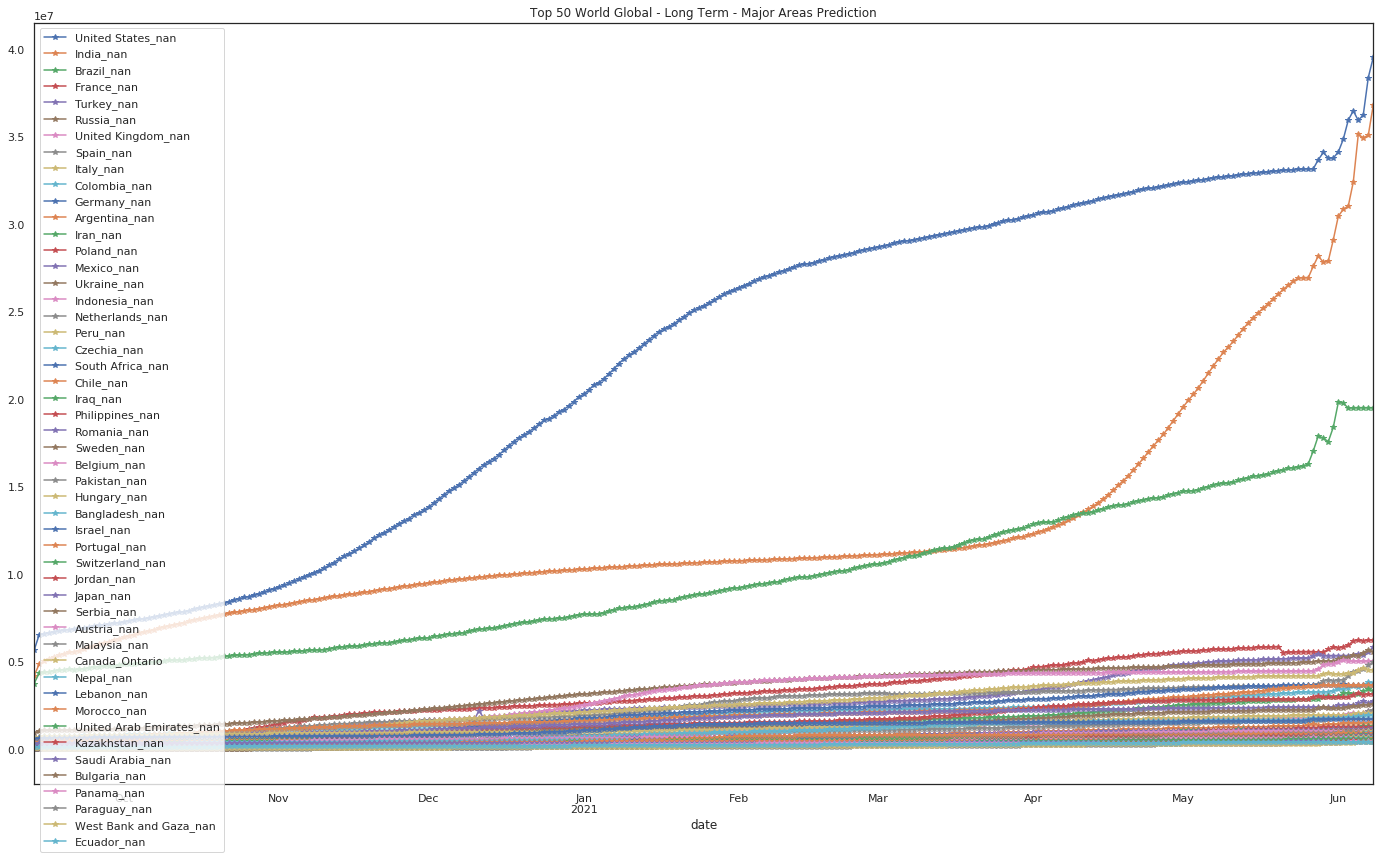

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

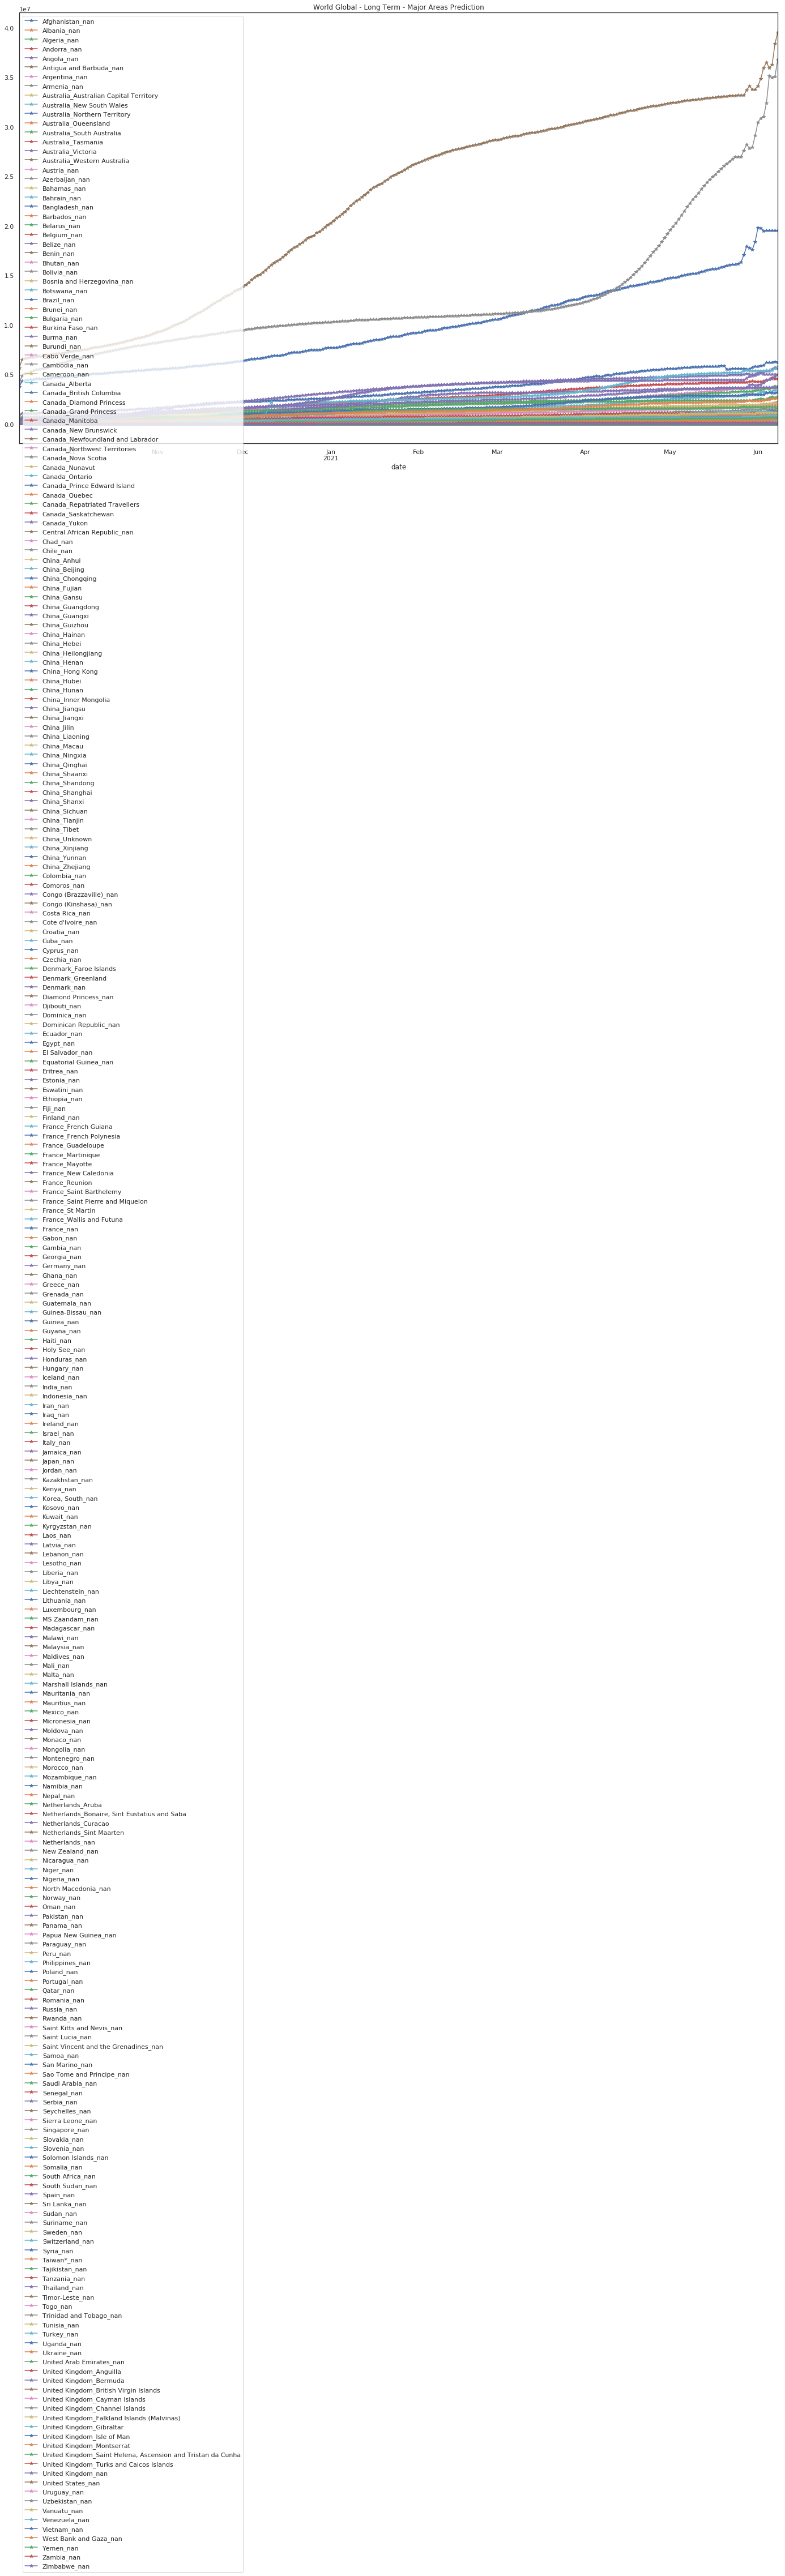

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41257.0      20018.0      57111.0       4471.0   
2020-10-29          41388.0      20290.0      57427.0       4517.0   
2020-10-30          41464.0      20619.0      57741.0       4690.0   
2020-10-31          41543.0      20860.0      58039.0       4665.0   
2020-11-01          41620.0      21199.0      58351.0       4756.0   
2020-11-02          41737.0      21498.0      58663.0       4859.0   
2020-11-03          41848.0      21873.0      59044.0       4888.0   
2020-11-04          41932.0      22264.0      59598.0       5111.0   
2020-11-05          42050.0      22684.0      60263.0       5045.0   
2020-11-06          42104.0      23165.0      60923.0       5135.0   
2020-11-07          42147.0      23648.0      61504.0       5470.0   
2020-11-08          42266.0      24148.0      62130.0       5319.0   
2020-11-09          42406.0      24673.0      62775.0       5417.0   
2020-11-10          42579.0      25221.0      63480.0       5509.0   
2020-11-11          42736.0      25730.0      64300.0       5581.0   
2020-11-12          42912.0      26162.0      65154.0       5567.0   
2020-11-13          43092.0      26648.0      66032.0       5716.0   
2020-11-14          43162.0      27153.0      66877.0       5725.0   
2020-11-15          43327.0      27739.0      67712.0       5985.0   
2020-11-16          43564.0      28352.0      68606.0       5872.0   
2020-11-17          43781.0      29046.0      69593.0       5974.0   
2020-11-18          44029.0      29760.0      70648.0       6062.0   
2020-11-19          44281.0      30541.0      71682.0       6018.0   
2020-11-20          44475.0      31366.0      72768.0       6131.0   
2020-11-21          44609.0      32114.0      73814.0       6142.0   
2020-11-22          44782.0      32703.0      74854.0       6218.0   
2020-11-23          45057.0      33453.0      75880.0       6307.0   
2020-11-24          45272.0      34183.0      76956.0       6348.0   
2020-11-25          45472.0      34844.0      78036.0       6417.0   
2020-11-26          45694.0      35516.0      79077.0       6455.0   
...                     ...          ...          ...          ...   
2021-05-10          62115.0     131835.0     124388.0      13423.0   
2021-05-11          62463.0     131869.0     124571.0      13429.0   
2021-05-12          62809.0     131918.0     124780.0      13447.0   
2021-05-13          63141.0     131962.0     124994.0      13470.0   
2021-05-14          63470.0     132017.0     125173.0      13494.0   
2021-05-15          63553.0     132060.0     125300.0      13510.0   
2021-05-16          63554.0     132097.0     125407.0      13510.0   
2021-05-17          63645.0     132117.0     125566.0      13538.0   
2021-05-18          63854.0     132144.0     125794.0      13555.0   
2021-05-19          64198.0     132180.0     126016.0      13569.0   
2021-05-20          64673.0     132197.0     126272.0      13569.0   
2021-05-21          65230.0     132232.0     126573.0      13569.0   
2021-05-22          65673.0     132263.0     126802.0      13569.0   
2021-05-23          65893.0     132291.0     126981.0      13569.0   
2021-05-24          66321.0     132306.0     127208.0      13569.0   
2021-05-25          66990.0     132306.0     127468.0      13637.0   
2021-05-26          67086.0     132313.0     127505.0      13872.0   
2021-05-27          66916.0     137929.0     127402.0      14000.0   
2021-05-28          66957.0     141470.0     127406.0      14106.0   
2021-05-29          70229.0     139116.0     127410.0      14511.0   
2021-05-30          71939.0     139348.0     131699.0      14802.0   
2021-05-31          73449.0     145232.0     134383.0      15218.0   
2021-06-01          74707.0     152324.0     132369.0      15284.0   
2021-06-02          73751.0     150965.0     132390.0      15218.0   
2021-06-03

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
251                                    Timor-Leste_nan  -8.874217  125.727539   
252                                           Togo_nan   8.619500    0.824800   
253                            Trinidad and Tobago_nan  10.691800  -61.222500   
254                                        Tunisia_nan  33.886917    9.537499   
255                                         Turkey_nan  38.963700   35.243300   
256                                  United States_nan  40.000000 -100.000000   
257                                         Uganda_nan   1.373333   32.290275   
258                                        Ukraine_nan  48.379400   31.165600   
259                           United Arab Emirates_nan  23.424076   53.847818   
260                            United Kingdom_Anguilla  18.220600  -63.068600   
261                             United Kingdom_Bermuda  32.307800  -64.750500   
262              United Kingdom_British Virgin Islands  18.420700  -64.640000   
263                      United Kingdom_Cayman Islands  19.313300  -81.254600   
264                     United Kingdom_Channel Islands  49.372300   -2.364400   
265         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
266                           United Kingdom_Gibraltar  36.140800   -5.353600   
267                         United Kingdom_Isle of Man  54.236100   -4.548100   
268                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)

for lat,lng,num,totpred,lastday7DayAvg,today7DayAvg in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]], \
                                                           (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg, \
                                                           (heatmap_m[heatmap_m.columns[ndayarray]]-heatmap_m[heatmap_m.columns[n2dayarray]])/ndaysavg):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' Current7DayAVG='+str(round(today7DayAvg))+' Predicted7DayAVG='+str(round(lastday7DayAvg))+' ConfTotPred='+str(round(totpred))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      20            Bangladesh_nan  23.685000   90.356300   
3      23               Belgium_nan  50.833300    4.469936   
4      30                Brazil_nan -14.235000  -51.925300   
5      32              Bulgaria_nan  42.733900   25.485800   
6      51            Canada_Ontario  51.253800  -85.323200   
7      59                 Chile_nan -35.675100  -71.543000   
8      94              Colombia_nan   4.570900  -74.297300   
9     103               Czechia_nan  49.817500   15.473000   
10    111               Ecuador_nan  -1.831200  -78.183400   
11    132                France_nan  46.227600    2.213700   
12    137               Germany_nan  51.165691   10.451526   
13    149               Hungary_nan  47.162500   19.503300   
14    151                 India_nan  20.593684   78.962880   
15    152             Indonesia_nan  -0.789300  113.921300   
16    153                  Iran_nan  32.427908   53.688046   
17    154                  Iraq_nan  33.223191   43.679291   
18    156                Israel_nan  31.046051   34.851612   
19    157                Israel_nan  31.046051   34.851612   
20    158                 Italy_nan  41.871940   12.567380   
21    160                 Japan_nan  36.204824  138.252924   
22    161                Jordan_nan  31.240000   36.510000   
23    162            Kazakhstan_nan  48.019600   66.923700   
24    170               Lebanon_nan  33.854700   35.862300   
25    171               Lebanon_nan  33.854700   35.862300   
26    181              Malaysia_nan   4.210484  101.975766   
27    188                Mexico_nan  23.634500 -102.552800   
28    194               Morocco_nan  31.791700   -7.092600   
29    197                 Nepal_nan  28.166700   84.250000   
30    202           Netherlands_nan  52.132600    5.291300   
31    210              Pakistan_nan  30.375300   69.345100   
32    211                Panama_nan   8.538000  -80.782100   
33    213              Paraguay_nan -23.442500  -58.443800   
34    214                  Peru_nan  -9.190000  -75.015200   
35    215           Philippines_nan  12.879721  121.774017   
36    216                Poland_nan  51.919400   19.145100   
37    217              Portugal_nan  39.399900   -8.224500   
38    219               Romania_nan  45.943200   24.966800   
39    220                Russia_nan  61.524010  105.318756   
40    228          Saudi Arabia_nan  23.885942   45.079162   
41    230                Serbia_nan  44.016500   21.005900   
42    238          South Africa_nan -30.559500   22.937500   
43    240                 Spain_nan  40.463667   -3.749220   
44    244                Sweden_nan  60.128161   18.643501   
45    245           Switzerland_nan  46.818200    8.227500   
46    255                Turkey_nan  38.963700   35.243300   
47    256         United States_nan  40.000000 -100.000000   
48    258               Ukraine_nan  48.379400   31.165600   
49    259  United Arab Emirates_nan  23.424076   53.847818   
50    271        United Kingdom_nan  55.378100   -3.436000   
51    277    West Bank and Gaza_nan  31.952200   35.233200   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              496036.0             555537.0             578975.0   
1               45507.0              45836.0              33541.0   
2              308005.0             337520.0             339850.0   
3               97510.0              98244.0              94306.0   
4             3751743.0            4330455.0            4383093.0   
5               32362.0              32485.0              18061.0   
6               57000.0              57362.0              46905.0   
7              391860.0             434748.0             436724.0   
8              634703.0             716319.0             728683.0   
9               48119.0    

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)

for lat2,lng2,num2,totpred2,lastday7DayAvg2,today7DayAvg2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], \
                                                                (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg, \
                                                                (heatmap_m2[heatmap_m2.columns[ndayarray]]-heatmap_m2[heatmap_m2.columns[n2dayarray]])/ndaysavg):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' Current7DayAvg='+str(round(today7DayAvg2))+' Predicted7DayAvg='+str(round(lastday7DayAvg2))+' ConfTotPred='+str(round(totpred2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()